
# 4.1 DATA COLLECTION:

In [1]:
### Importing the libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split


### Importing the libraries for visualization
from matplotlib import pyplot
from matplotlib.lines import Line2D
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


### Importing the libraries for preprocessing
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

#For analysing cluster performancw
from sklearn.metrics import silhouette_score, davies_bouldin_score, mutual_info_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
relation = pd.read_csv("relationships.csv", sep='\t', encoding='cp1252')

In [3]:
relation

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PK,PD,PMIDs
0,PA142672624,ANKFN1,Gene,PA447288,Essential hypertension,Disease,"ClinicalAnnotation,VariantAnnotation",associated,NaN,PD,25695618
1,PA142672624,ANKFN1,Gene,PA449899,hydrochlorothiazide,Chemical,"ClinicalAnnotation,VariantAnnotation",associated,NaN,PD,25695618
2,PA164722583,MIR2053,Gene,PA166122058,mucositis,Disease,VariantAnnotation,not associated,NaN,NaN,28628559
3,PA164722583,MIR2053,Gene,PA443937,Drug Toxicity,Disease,VariantAnnotation,not associated,NaN,NaN,24614921
4,PA164722583,MIR2053,Gene,PA446155,Precursor Cell Lymphoblastic Leukemia-Lymphoma,Disease,VariantAnnotation,not associated,NaN,NaN,24614921;28628559
...,...,...,...,...,...,...,...,...,...,...,...
118599,PA166155830,rs13401281,Variant,PA445062,Neoplasms,Disease,VariantAnnotation,not associated,NaN,NaN,23670235
118600,PA166157455,rs12535293,Variant,PA447216,Schizophrenia,Disease,VariantAnnotation,not associated,NaN,NaN,21519338
118601,PA166157455,rs12535293,Variant,PA450688,olanzapine,Chemical,VariantAnnotation,not associated,NaN,NaN,21519338
118602,PA166155301,rs6506569,Variant,PA443434,"Arthritis, Rheumatoid",Disease,"ClinicalAnnotation,VariantAnnotation",ambiguous,NaN,PD,24583629;29743634


In [4]:
print(relation.columns)

Index(['Entity1_id', 'Entity1_name', 'Entity1_type', 'Entity2_id',
       'Entity2_name', 'Entity2_type', 'Evidence', 'Association', 'PK', 'PD',
       'PMIDs'],
      dtype='object')


In [5]:
# The summary statistics of the dataframe
print("\nSummary statistics of the dataframe:")
relation.describe(include='all')


Summary statistics of the dataframe:


,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PK,PD,PMIDs
count,118604,118604,118604,118604,118604,118604,118604,118604,0.0,32678,113242
unique,11817,11817,5,11817,11818,5,142,3,NaN,1,12043
top,PA447216,Schizophrenia,Chemical,PA443560,Breast Neoplasms,Chemical,VariantAnnotation,associated,NaN,PD,24787449;36049896
freq,667,667,31750,667,667,31750,65508,68260,NaN,32678,2084
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
relation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118604 entries, 0 to 118603
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Entity1_id    118604 non-null  object 
 1   Entity1_name  118604 non-null  object 
 2   Entity1_type  118604 non-null  object 
 3   Entity2_id    118604 non-null  object 
 4   Entity2_name  118604 non-null  object 
 5   Entity2_type  118604 non-null  object 
 6   Evidence      118604 non-null  object 
 7   Association   118604 non-null  object 
 8   PK            0 non-null       float64
 9   PD            32678 non-null   object 
 10  PMIDs         113242 non-null  object 
dtypes: float64(1), object(10)
memory usage: 10.0+ MB


In [7]:
relation.shape

(118604, 11)

In [8]:
# The unique values of the `Evidence` column
unique_names = set(relation['Evidence'].str.split(',').explode())
print(unique_names)

{'MultilinkAnnotation', 'GuidelineAnnotation', 'Pathway', 'ClinicalAnnotation', 'Literature', 'DataAnnotation', 'VariantAnnotation', 'VipGene', 'LabelAnnotation'}


In [9]:
relation['Association'].value_counts()

associated        68260
not associated    31814
ambiguous         18530
Name: Association, dtype: int64

# 4.2.1 DATA EXPLORATION:


In [10]:
#findin the details of missing values
number_of_missing_values = relation.isnull().sum()
percent_of_missing_values = relation.isnull().sum()/relation.shape[0]*100

final_value = {
    'Number of  missing Values':number_of_missing_values,
    'Percent of missing Values':percent_of_missing_values
}
Missing_data_details = pd.DataFrame(final_value)
Missing_data_details

,Number of missing Values,Percent of missing Values
Entity1_id,0,0.000000
Entity1_name,0,0.000000
Entity1_type,0,0.000000
Entity2_id,0,0.000000
Entity2_name,0,0.000000
Entity2_type,0,0.000000
Evidence,0,0.000000
Association,0,0.000000
PK,118604,100.000000
PD,85926,72.447810


<Axes: >

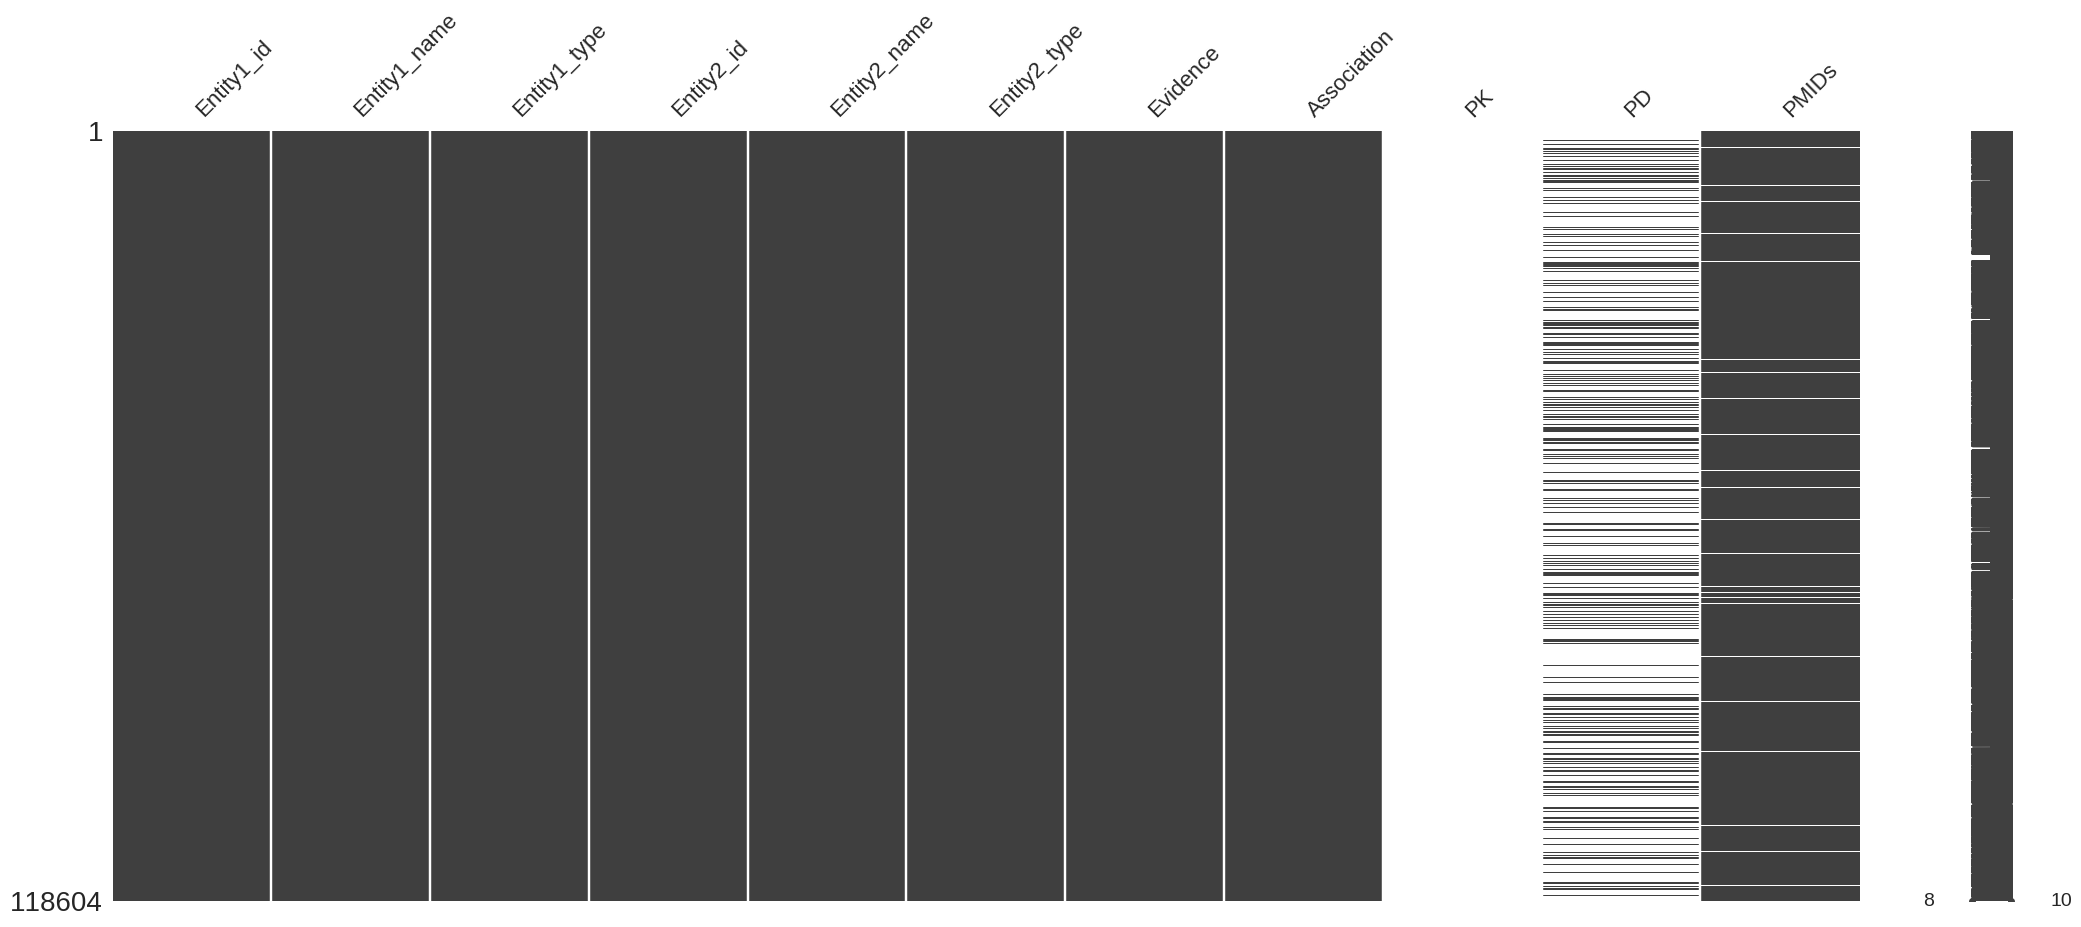

In [11]:
# Visualize missing data
msno.matrix(relation)

In [12]:
relation = relation.drop(['PK'], axis=1)

In [13]:
#detecting duplicates
duplicate_rows = relation[relation.duplicated()]
print(duplicate_rows)

#Removing duplicates if present
relation = relation.drop_duplicates(keep='first')


Empty DataFrame
Columns: [Entity1_id, Entity1_name, Entity1_type, Entity2_id, Entity2_name, Entity2_type, Evidence, Association, PD, PMIDs]
Index: []


# 4.2.2 DATA PREPARATION

## ENTITY 1 AND ENTITY 2:

In [123]:
# The unique values of the `Entity1_type` column
entity1_types = relation['Entity1_type'].unique()
print(entity1_types)
relation['Entity1_type'].value_counts()

['Gene' 'Chemical' 'Variant' 'Disease' 'Haplotype']


Variant      14731
Chemical     14493
Disease      13510
Gene         11210
Haplotype     5368
Name: Entity1_type, dtype: int64

In [15]:
# The unique values of the `Entity2_type` column
entity2_types = relation['Entity2_type'].unique()
print(entity2_types)
relation['Entity2_type'].value_counts()

['Disease' 'Chemical' 'Variant' 'Gene' 'Haplotype']


Chemical     31750
Variant      29491
Disease      25657
Gene         21545
Haplotype    10161
Name: Entity2_type, dtype: int64

In [16]:
# Create new columns to store sorted names for both entities
relation['Entity1_sorted'] = relation.apply(lambda row: tuple(sorted([row['Entity1_name'], row['Entity2_name']])), axis=1)
relation['Entity2_sorted'] = relation.apply(lambda row: tuple(sorted([row['Entity1_name'], row['Entity2_name']])), axis=1)

# Drop duplicate combinations of Entity1_sorted and Entity2_sorted
relation.drop_duplicates(subset=['Entity1_sorted', 'Entity2_sorted'], inplace=True)

relation = relation.drop(['Entity1_sorted'], axis=1)
relation = relation.drop(['Entity2_sorted'], axis=1)

In [17]:
# A list of all possible combinations
possible_combinations = []
for entity1_type in entity1_types:
  for entity2_type in entity2_types:
    possible_combinations.append((entity1_type, entity2_type))
print(possible_combinations)

[('Gene', 'Disease'), ('Gene', 'Chemical'), ('Gene', 'Variant'), ('Gene', 'Gene'), ('Gene', 'Haplotype'), ('Chemical', 'Disease'), ('Chemical', 'Chemical'), ('Chemical', 'Variant'), ('Chemical', 'Gene'), ('Chemical', 'Haplotype'), ('Variant', 'Disease'), ('Variant', 'Chemical'), ('Variant', 'Variant'), ('Variant', 'Gene'), ('Variant', 'Haplotype'), ('Disease', 'Disease'), ('Disease', 'Chemical'), ('Disease', 'Variant'), ('Disease', 'Gene'), ('Disease', 'Haplotype'), ('Haplotype', 'Disease'), ('Haplotype', 'Chemical'), ('Haplotype', 'Variant'), ('Haplotype', 'Gene'), ('Haplotype', 'Haplotype')]


In [18]:
def find_available_combinations(df, column1, column2):
    combinations = {}
    column_indices = {column: index for index, column in enumerate(df.columns)}
    for row in df.itertuples():
        value1 = row[column_indices[column1] + 1]
        value2 = row[column_indices[column2] + 1]
        combination = (value1, value2)
        reverse_combination = (value2, value1)
        if combination in combinations:
            combinations[combination] += 1
        elif reverse_combination in combinations:
            combinations[reverse_combination] += 1
        else:
            combinations[combination] = 1
    return combinations

In [19]:
if __name__ == "__main__":
    combinations = find_available_combinations(relation, 'Entity1_type', 'Entity2_type')
    print(combinations)
    combined_combinations = {}
    for combination, count in combinations.items():
        reverse_combination = (combination[1], combination[0])
        if reverse_combination in combined_combinations:
            combined_combinations[reverse_combination] += count
        else:
            combined_combinations[combination] = count


    relation['Combination'] = np.nan
    for combination, count in combined_combinations.items():
        mask = ((relation['Entity1_type'] == combination[0]) & (relation['Entity2_type'] == combination[1])) | \
               ((relation['Entity1_type'] == combination[1]) & (relation['Entity2_type'] == combination[0]))
        relation.loc[mask, 'Combination'] = f"{combination[0]} - {combination[1]}"


    relation['Combination'].fillna("No Combination", inplace=True)

{('Gene', 'Disease'): 8178, ('Gene', 'Chemical'): 10143, ('Gene', 'Variant'): 451, ('Variant', 'Chemical'): 15134, ('Variant', 'Disease'): 13898, ('Disease', 'Haplotype'): 3562, ('Haplotype', 'Chemical'): 6391, ('Gene', 'Gene'): 1291, ('Haplotype', 'Gene'): 202, ('Chemical', 'Chemical'): 44, ('Disease', 'Disease'): 11, ('Variant', 'Haplotype'): 4, ('Variant', 'Variant'): 2, ('Haplotype', 'Haplotype'): 1}


In [20]:
relation['Combination'].value_counts()

Variant - Chemical       15134
Variant - Disease        13898
Gene - Chemical          10143
Gene - Disease            8178
Haplotype - Chemical      6391
Disease - Haplotype       3562
Gene - Gene               1291
Gene - Variant             451
Haplotype - Gene           202
Chemical - Chemical         44
Disease - Disease           11
Variant - Haplotype          4
Variant - Variant            2
Haplotype - Haplotype        1
Name: Combination, dtype: int64

In [21]:
# Replace 'gene_disease_df' with the name of your DataFrame
relation.to_csv('relationship_cleaned.csv', index=False)

from google.colab import files
files.download('relationship_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import pandas as pd


# Filter data for ('Gene', 'Disease') combination
gene_disease_df = relation[(relation['Combination'] =='Gene - Disease')]


# Filter data for ('Gene', 'Chemical') combination
gene_chemical_df = relation[(relation['Combination'] =='Gene - Chemical')]


# Filter data for ('Gene', 'Variant') combination
gene_variant_df = relation[(relation['Combination'] =='Gene - Variant')]


# Filter data for ('Variant', 'Chemical') combination
variant_chemical_df = relation[(relation['Combination'] =='Variant - Chemaical')]


# Filter data for ('Variant', 'Disease') combination
variant_disease_df = relation[(relation['Combination'] =='Variant - Disease')]


# Filter data for ('Disease', 'Haplotype') combination
disease_haplotype_df = relation[(relation['Combination'] =='Disease - Haplotype')]


# Filter data for ('Haplotype', 'Chemical') combination
haplotype_chemical_df = relation[(relation['Combination'] =='Haplotype - Chemical')]


# Filter data for ('Haplotype', 'Gene') combination
haplotype_gene_df = relation[(relation['Combination'] =='Haplotype - Gene')]


# Filter data for ('Variant', 'Haplotype') combination
variant_haplotype_df = relation [(relation['Combination'] =='Variant - Haplotype')]


#Filter data for same types dataframe
same_relation_df = relation[(relation['Combination'] =='Gene - Gene') & (relation['Combination'] =='Haplotype - Haplotype') & (relation['Combination'] =='Chemical - Chemical') & (relation['Combination'] =='Disease - Disease') & (relation['Combination'] =='Variant - Variant')]


## EVIDENCE COLUMN

In [23]:
unique_names = set(gene_disease_df['Evidence'].str.split(',').explode())
print(unique_names)

{'MultilinkAnnotation', 'ClinicalAnnotation', 'Literature', 'VariantAnnotation', 'VipGene'}


In [24]:

gene_disease_df['Evidence'] = gene_disease_df['Evidence'].astype(str)

for value in unique_names:
    gene_disease_df[value] = gene_disease_df['Evidence'].apply(lambda x: 1 if value in x.split(',') else np.nan)

## GENE - DISEASE DATFRAME:

In [25]:
gene_disease_df

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PD,PMIDs,Combination,MultilinkAnnotation,ClinicalAnnotation,Literature,VariantAnnotation,VipGene
0,PA142672624,ANKFN1,Gene,PA447288,Essential hypertension,Disease,"ClinicalAnnotation,VariantAnnotation",associated,PD,25695618,Gene - Disease,NaN,1.0,NaN,1.0,NaN
2,PA164722583,MIR2053,Gene,PA166122058,mucositis,Disease,VariantAnnotation,not associated,NaN,28628559,Gene - Disease,NaN,NaN,NaN,1.0,NaN
3,PA164722583,MIR2053,Gene,PA443937,Drug Toxicity,Disease,VariantAnnotation,not associated,NaN,24614921,Gene - Disease,NaN,NaN,NaN,1.0,NaN
4,PA164722583,MIR2053,Gene,PA446155,Precursor Cell Lymphoblastic Leukemia-Lymphoma,Disease,VariantAnnotation,not associated,NaN,24614921;28628559,Gene - Disease,NaN,NaN,NaN,1.0,NaN
20,PA31744,NQO1,Gene,PA151958383,Gastrointestinal Stromal Tumors,Disease,"ClinicalAnnotation,VariantAnnotation",associated,PD,30237583,Gene - Disease,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116749,PA443622,"Carcinoma, Non-Small-Cell Lung",Disease,PA31601,NFKBIA,Gene,"ClinicalAnnotation,VariantAnnotation",ambiguous,PD,31664190,Gene - Disease,NaN,1.0,NaN,1.0,NaN
116768,PA443622,"Carcinoma, Non-Small-Cell Lung",Disease,PA34183,RAF1,Gene,"ClinicalAnnotation,VariantAnnotation",associated,PD,21636554,Gene - Disease,NaN,1.0,NaN,1.0,NaN
116818,PA31601,NFKBIA,Gene,PA443899,Diarrhea,Disease,"ClinicalAnnotation,VariantAnnotation",ambiguous,PD,31664190,Gene - Disease,NaN,1.0,NaN,1.0,NaN
117367,PA443899,Diarrhea,Disease,PA107,CES1,Gene,VariantAnnotation,associated,NaN,36630849,Gene - Disease,NaN,NaN,NaN,1.0,NaN


In [26]:
print(gene_disease_df.columns)

Index(['Entity1_id', 'Entity1_name', 'Entity1_type', 'Entity2_id',
       'Entity2_name', 'Entity2_type', 'Evidence', 'Association', 'PD',
       'PMIDs', 'Combination', 'MultilinkAnnotation', 'ClinicalAnnotation',
       'Literature', 'VariantAnnotation', 'VipGene'],
      dtype='object')


In [27]:
gene_disease_df.head().T

,0,2,3,4,20
Entity1_id,PA142672624,PA164722583,PA164722583,PA164722583,PA31744
Entity1_name,ANKFN1,MIR2053,MIR2053,MIR2053,NQO1
Entity1_type,Gene,Gene,Gene,Gene,Gene
Entity2_id,PA447288,PA166122058,PA443937,PA446155,PA151958383
Entity2_name,Essential hypertension,mucositis,Drug Toxicity,Precursor Cell Lymphoblastic Leukemia-Lymphoma,Gastrointestinal Stromal Tumors
Entity2_type,Disease,Disease,Disease,Disease,Disease
Evidence,"ClinicalAnnotation,VariantAnnotation",VariantAnnotation,VariantAnnotation,VariantAnnotation,"ClinicalAnnotation,VariantAnnotation"
Association,associated,not associated,not associated,not associated,associated
PD,PD,NaN,NaN,NaN,PD
PMIDs,25695618,28628559,24614921,24614921;28628559,30237583


In [28]:

number_of_missing_values = gene_disease_df.isnull().sum()
percent_of_missing_values = gene_disease_df.isnull().sum()/gene_disease_df.shape[0]*100

final_value = {
    'Number of  missing Values':number_of_missing_values,
    'Percent of missing Values':percent_of_missing_values
}
Missing_data_details = pd.DataFrame(final_value)
Missing_data_details

,Number of missing Values,Percent of missing Values
Entity1_id,0,0.000000
Entity1_name,0,0.000000
Entity1_type,0,0.000000
Entity2_id,0,0.000000
Entity2_name,0,0.000000
Entity2_type,0,0.000000
Evidence,0,0.000000
Association,0,0.000000
PD,5569,68.097334
PMIDs,66,0.807043


In [29]:
#detecting duplicates
duplicate_rows = gene_disease_df[gene_disease_df.duplicated()]
print(duplicate_rows)

#Removing duplicates if present
gene_disease_df = gene_disease_df.drop_duplicates(keep='first')

Empty DataFrame
Columns: [Entity1_id, Entity1_name, Entity1_type, Entity2_id, Entity2_name, Entity2_type, Evidence, Association, PD, PMIDs, Combination, MultilinkAnnotation, ClinicalAnnotation, Literature, VariantAnnotation, VipGene]
Index: []


In [30]:
"""from sklearn.impute import KNNImputer

def knn_imputation(dataframe, columns, n_neighbors=5):
    imputed_dataframe = dataframe.copy()

    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_values = imputer.fit_transform(imputed_dataframe[columns])

    imputed_dataframe[columns] = imputed_values

    return imputed_dataframe
if __name__ == "__main__":
    column_list = ['Literature', 'MultilinkAnnotation', 'VipGene', 'VariantAnnotation', 'ClinicalAnnotation']
    # Perform knn imputation
    imputed_dataframe = knn_imputation(gene_disease_df, columns=column_list)

    # Assign the imputed values back to the original DataFrame.
    gene_disease_df[column_list] = imputed_dataframe[column_list]"""

'from sklearn.impute import KNNImputer\n\ndef knn_imputation(dataframe, columns, n_neighbors=5):\n    imputed_dataframe = dataframe.copy()\n\n    imputer = KNNImputer(n_neighbors=n_neighbors)\n    imputed_values = imputer.fit_transform(imputed_dataframe[columns])\n\n    imputed_dataframe[columns] = imputed_values\n\n    return imputed_dataframe\nif __name__ == "__main__":\n    column_list = [\'Literature\', \'MultilinkAnnotation\', \'VipGene\', \'VariantAnnotation\', \'ClinicalAnnotation\']\n    # Perform knn imputation \n    imputed_dataframe = knn_imputation(gene_disease_df, columns=column_list)\n\n    # Assign the imputed values back to the original DataFrame.\n    gene_disease_df[column_list] = imputed_dataframe[column_list]'

In [31]:
"""import pandas as pd
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

column_list = ['VipGene', 'Literature', 'MultilinkAnnotation', 'VariantAnnotation', 'ClinicalAnnotation']
data_with_missing_values = gene_disease_df[column_list]
imputed_df = gene_disease_df.copy()
mask_missing_values = data_with_missing_values.isnull()

#Loop through each column and perform imputation using HistGradientBoostingClassifier
for column in column_list:
    if mask_missing_values[column].any():
        target_column = data_with_missing_values[column]
        features = data_with_missing_values.drop(column, axis=1)
        known_features = features[~mask_missing_values[column]]
        unknown_features = features[mask_missing_values[column]]
        known_target = target_column[~mask_missing_values[column]]  # Only include non-missing target values

        # Train the HistGradientBoostingClassifier model
        hgbc_model = HistGradientBoostingClassifier(random_state=42)
        hgbc_model.fit(known_features, known_target)
        imputed_values = hgbc_model.predict(unknown_features)


        imputed_df.loc[mask_missing_values[column], column] = imputed_values
        gene_disease_df[column_list] = imputed_df[column_list]

print(gene_disease_df)
"""

"import pandas as pd\nfrom sklearn.experimental import enable_hist_gradient_boosting  # noqa\nfrom sklearn.ensemble import HistGradientBoostingClassifier\n\ncolumn_list = ['VipGene', 'Literature', 'MultilinkAnnotation', 'VariantAnnotation', 'ClinicalAnnotation']\ndata_with_missing_values = gene_disease_df[column_list]\nimputed_df = gene_disease_df.copy()\nmask_missing_values = data_with_missing_values.isnull()\n\n#Loop through each column and perform imputation using HistGradientBoostingClassifier\nfor column in column_list:\n    if mask_missing_values[column].any():\n        target_column = data_with_missing_values[column]\n        features = data_with_missing_values.drop(column, axis=1)\n        known_features = features[~mask_missing_values[column]]\n        unknown_features = features[mask_missing_values[column]]\n        known_target = target_column[~mask_missing_values[column]]  # Only include non-missing target values\n\n        # Train the HistGradientBoostingClassifier model\n

In [32]:
"""import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = ['VipGene', 'Literature', 'MultilinkAnnotation', 'VariantAnnotation', 'ClinicalAnnotation']
data_with_missing_values = gene_disease_df[columns_to_impute]
imputed_df = gene_disease_df.copy()
mask_missing_values = data_with_missing_values.isnull()

for column in columns_to_impute:

    if mask_missing_values[column].any():
        target_column = data_with_missing_values[column]
        features = data_with_missing_values.drop(column, axis=1)
        known_features = features[~mask_missing_values[column]]
        unknown_features = features[mask_missing_values[column]]
        known_target = target_column[~mask_missing_values[column]]

        # Create the MICE imputer
        mice_imputer = IterativeImputer(random_state=42)
        mice_imputer.fit(known_features)
        imputed_values = mice_imputer.transform(unknown_features)

        imputed_df_for_column = pd.DataFrame(imputed_values, columns=features.columns)
        imputed_df.loc[mask_missing_values[column], column] = imputed_df_for_column[column]
        gene_disease_df[column_list] = imputed_df[column_list]

print(gene_disease_df)
"""

"import pandas as pd\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\n\ncolumns_to_impute = ['VipGene', 'Literature', 'MultilinkAnnotation', 'VariantAnnotation', 'ClinicalAnnotation']\ndata_with_missing_values = gene_disease_df[columns_to_impute]\nimputed_df = gene_disease_df.copy()\nmask_missing_values = data_with_missing_values.isnull()\n\nfor column in columns_to_impute:\n\n    if mask_missing_values[column].any():\n        target_column = data_with_missing_values[column]\n        features = data_with_missing_values.drop(column, axis=1)\n        known_features = features[~mask_missing_values[column]]\n        unknown_features = features[mask_missing_values[column]]\n        known_target = target_column[~mask_missing_values[column]]\n\n        # Create the MICE imputer\n        mice_imputer = IterativeImputer(random_state=42)\n        mice_imputer.fit(known_features)\n        imputed_values = mice_imputer.transform(unknown_featu

In [33]:
"""imputed_df = gene_disease_df.copy()
column_list = ['VipGene', 'Literature', 'MultilinkAnnotation', 'VariantAnnotation', 'ClinicalAnnotation', 'PD']
mask_missing_values = imputed_df[column_list].isnull()
num_iterations = 1000  # Number of bootstrap iterations

for column in column_list:
    if mask_missing_values[column].any():
        imputed_values = np.zeros((num_iterations, len(imputed_df)))

        for i in range(num_iterations):
            # Create a bootstrap sample by resampling with replacement
            bootstrap_sample = imputed_df.sample(n=len(imputed_df), replace=True)
            target_column = bootstrap_sample[column]
            features = bootstrap_sample.drop(column, axis=1)

            # Split data into known and unknown (with missing values)
            known_features = features[~mask_missing_values[column]]
            unknown_features = features[mask_missing_values[column]]
            known_target = target_column[~mask_missing_values[column]]  # Only include non-missing target values
            imputed_values[i][mask_missing_values[column]] = np.mean(known_target)


        final_imputed_values = np.mean(imputed_values, axis=0)
        imputed_df.loc[mask_missing_values[column], column] = final_imputed_values[mask_missing_values[column]]
        gene_disease_df[column_list] = imputed_df[column_list]

print(gene_disease_df)
"""

"imputed_df = gene_disease_df.copy()\ncolumn_list = ['VipGene', 'Literature', 'MultilinkAnnotation', 'VariantAnnotation', 'ClinicalAnnotation', 'PD']\nmask_missing_values = imputed_df[column_list].isnull()\nnum_iterations = 1000  # Number of bootstrap iterations\n\nfor column in column_list:\n    if mask_missing_values[column].any():\n        imputed_values = np.zeros((num_iterations, len(imputed_df)))\n\n        for i in range(num_iterations):\n            # Create a bootstrap sample by resampling with replacement\n            bootstrap_sample = imputed_df.sample(n=len(imputed_df), replace=True)\n            target_column = bootstrap_sample[column]\n            features = bootstrap_sample.drop(column, axis=1)\n\n            # Split data into known and unknown (with missing values)\n            known_features = features[~mask_missing_values[column]]\n            unknown_features = features[mask_missing_values[column]]\n            known_target = target_column[~mask_missing_values[colum

In [34]:
columns_to_encode = ['VipGene', 'Literature', 'MultilinkAnnotation',
                     'VariantAnnotation', 'ClinicalAnnotation', 'PD']

In [35]:
"""import numpy as np
from sklearn.preprocessing import LabelEncoder
def one_hot_encode(df, columns_to_encode):
    for column in columns_to_encode:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        df = pd.get_dummies(df, columns=[column])
    return df
gene_disease_df = one_hot_encode(gene_disease_df, columns_to_encode)
"""

'import numpy as np\nfrom sklearn.preprocessing import LabelEncoder\ndef one_hot_encode(df, columns_to_encode):\n    for column in columns_to_encode:\n        encoder = LabelEncoder()\n        df[column] = encoder.fit_transform(df[column])\n        df = pd.get_dummies(df, columns=[column])\n    return df\ngene_disease_df = one_hot_encode(gene_disease_df, columns_to_encode)\n'

In [36]:
for column in columns_to_encode:
    gene_disease_df[column] = gene_disease_df[column].notnull().astype(np.int)

In [37]:
gene_disease_df= gene_disease_df.dropna()

In [38]:
gene_disease_df

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PD,PMIDs,Combination,MultilinkAnnotation,ClinicalAnnotation,Literature,VariantAnnotation,VipGene
0,PA142672624,ANKFN1,Gene,PA447288,Essential hypertension,Disease,"ClinicalAnnotation,VariantAnnotation",associated,1,25695618,Gene - Disease,0,1,0,1,0
2,PA164722583,MIR2053,Gene,PA166122058,mucositis,Disease,VariantAnnotation,not associated,0,28628559,Gene - Disease,0,0,0,1,0
3,PA164722583,MIR2053,Gene,PA443937,Drug Toxicity,Disease,VariantAnnotation,not associated,0,24614921,Gene - Disease,0,0,0,1,0
4,PA164722583,MIR2053,Gene,PA446155,Precursor Cell Lymphoblastic Leukemia-Lymphoma,Disease,VariantAnnotation,not associated,0,24614921;28628559,Gene - Disease,0,0,0,1,0
20,PA31744,NQO1,Gene,PA151958383,Gastrointestinal Stromal Tumors,Disease,"ClinicalAnnotation,VariantAnnotation",associated,1,30237583,Gene - Disease,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116749,PA443622,"Carcinoma, Non-Small-Cell Lung",Disease,PA31601,NFKBIA,Gene,"ClinicalAnnotation,VariantAnnotation",ambiguous,1,31664190,Gene - Disease,0,1,0,1,0
116768,PA443622,"Carcinoma, Non-Small-Cell Lung",Disease,PA34183,RAF1,Gene,"ClinicalAnnotation,VariantAnnotation",associated,1,21636554,Gene - Disease,0,1,0,1,0
116818,PA31601,NFKBIA,Gene,PA443899,Diarrhea,Disease,"ClinicalAnnotation,VariantAnnotation",ambiguous,1,31664190,Gene - Disease,0,1,0,1,0
117367,PA443899,Diarrhea,Disease,PA107,CES1,Gene,VariantAnnotation,associated,0,36630849,Gene - Disease,0,0,0,1,0


In [39]:
gene_disease_df['Evidence score']= gene_disease_df[['Literature',	'MultilinkAnnotation',	'VariantAnnotation',	'ClinicalAnnotation','VipGene',	'PD']].sum(axis=1)

In [40]:
gene_disease_df['Evidence score'].value_counts()

1    5112
3    2373
2     535
5      61
4      26
6       5
Name: Evidence score, dtype: int64

In [41]:
import pywt

def wavelet_denoise(data, wavelet="db1", level=1):
    # Wavelet decomposition.
    coefficients = pywt.wavedec(data, wavelet, level=level)
    threshold = np.std(coefficients[1:]) * np.sqrt(2 * np.log(len(coefficients[1:])))
    coefficients[1:] = np.where(np.abs(coefficients[1:]) > threshold, 0, coefficients[1:])
    denoised_data = pywt.waverec(coefficients, wavelet)
    return denoised_data

def denoise_dataframe(dataframe, columns, wavelet="db1", level=1):
    # Drop the rows with missing values.
    denoised_dataframe = dataframe.copy()
    denoised_dataframe = denoised_dataframe.dropna(axis=0)
    for column in columns:
        denoised_dataframe[column] = wavelet_denoise(dataframe[column].values, wavelet=wavelet, level=level)
    return denoised_dataframe

from sklearn.impute import KNNImputer

def knn_imputation(dataframe, columns, n_neighbors=5):
    imputed_dataframe = dataframe.copy()
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_values = imputer.fit_transform(imputed_dataframe[columns])
    imputed_dataframe[columns] = imputed_values
    return imputed_dataframe

if __name__ == "__main__":
    column_list = ['Literature', 'MultilinkAnnotation', 'VipGene', 'VariantAnnotation', 'ClinicalAnnotation']
    # Denoising and Imputing the DataFrame.
    denoised_dataframe = denoise_dataframe(gene_disease_df, columns=column_list, wavelet="db1", level=1)
    imputed_dataframe = knn_imputation(denoised_dataframe, columns=column_list)
    gene_disease_df[column_list] = imputed_dataframe[column_list]
    print(gene_disease_df)


         Entity1_id                    Entity1_name Entity1_type   Entity2_id  \
0       PA142672624                          ANKFN1         Gene     PA447288   
2       PA164722583                         MIR2053         Gene  PA166122058   
3       PA164722583                         MIR2053         Gene     PA443937   
4       PA164722583                         MIR2053         Gene     PA446155   
20          PA31744                            NQO1         Gene  PA151958383   
...             ...                             ...          ...          ...   
116749     PA443622  Carcinoma, Non-Small-Cell Lung      Disease      PA31601   
116768     PA443622  Carcinoma, Non-Small-Cell Lung      Disease      PA34183   
116818      PA31601                          NFKBIA         Gene     PA443899   
117367     PA443899                        Diarrhea      Disease        PA107   
117373     PA443899                        Diarrhea      Disease  PA134888863   

                           

In [42]:
"""
def moving_average_denoising(data, window_size):
    moving_average = np.convolve(data, np.ones(window_size)/window_size, mode="same")
    denoised_data = data - moving_average
    return denoised_data

def denoise_dataframe(dataframe, columns, window_size):
    denoised_dataframe = dataframe.copy()
    for column in columns:
        denoised_dataframe[column] = moving_average_denoising(dataframe[column].values, window_size)
    return denoised_dataframe

if __name__ == "__main__":
    column_list = ['Literature',	'MultilinkAnnotation',	'VariantAnnotation',	'ClinicalAnnotation',	'PD']
    # Denoise the DataFrame using moving average.
    denoised_dataframe = denoise_dataframe(gene_disease_df.iloc[:-1], columns=column_list, window_size=10)
    gene_disease_df[column_list] = denoised_dataframe[column_list]
    print(gene_disease_df)
"""

'\ndef moving_average_denoising(data, window_size):\n    moving_average = np.convolve(data, np.ones(window_size)/window_size, mode="same")\n    denoised_data = data - moving_average\n    return denoised_data\n\ndef denoise_dataframe(dataframe, columns, window_size):\n    denoised_dataframe = dataframe.copy()\n    for column in columns:\n        denoised_dataframe[column] = moving_average_denoising(dataframe[column].values, window_size)\n    return denoised_dataframe\n\nif __name__ == "__main__":\n    column_list = [\'Literature\',\t\'MultilinkAnnotation\',\t\'VariantAnnotation\',\t\'ClinicalAnnotation\',\t\'PD\']\n    # Denoise the DataFrame using moving average.\n    denoised_dataframe = denoise_dataframe(gene_disease_df.iloc[:-1], columns=column_list, window_size=10)\n    gene_disease_df[column_list] = denoised_dataframe[column_list]\n    print(gene_disease_df)\n'

In [43]:
"""
from scipy.signal import savgol_filter

def savitzky_golay_denoising(data, window_size, polyorder):
    # Apply the Savitzky-Golay filter to the data.
    denoised_data = savgol_filter(data, window_size, polyorder)
    return denoised_data

def denoise_dataframe(dataframe, columns, window_size, polyorder):
    denoised_dataframe = dataframe.copy()
    for column in columns:
        denoised_dataframe[column] = savitzky_golay_denoising(dataframe[column].values, window_size, polyorder)
    return denoised_dataframe

if __name__ == "__main__":
    column_list = ['Literature',	'MultilinkAnnotation',	'VariantAnnotation',	'ClinicalAnnotation',	'PD']
    # Denoise the DataFrame using Savitzky-Golay filter.
    denoised_dataframe = denoise_dataframe(gene_disease_df.iloc[:-1], columns=column_list, window_size=10, polyorder=3)
    gene_disease_df[column_list] = denoised_dataframe[column_list]
    print(gene_disease_df)
"""

'\nfrom scipy.signal import savgol_filter\n\ndef savitzky_golay_denoising(data, window_size, polyorder):\n    # Apply the Savitzky-Golay filter to the data.\n    denoised_data = savgol_filter(data, window_size, polyorder)\n    return denoised_data\n\ndef denoise_dataframe(dataframe, columns, window_size, polyorder):\n    denoised_dataframe = dataframe.copy()\n    for column in columns:\n        denoised_dataframe[column] = savitzky_golay_denoising(dataframe[column].values, window_size, polyorder)\n    return denoised_dataframe\n\nif __name__ == "__main__":\n    column_list = [\'Literature\',\t\'MultilinkAnnotation\',\t\'VariantAnnotation\',\t\'ClinicalAnnotation\',\t\'PD\']\n    # Denoise the DataFrame using Savitzky-Golay filter.\n    denoised_dataframe = denoise_dataframe(gene_disease_df.iloc[:-1], columns=column_list, window_size=10, polyorder=3)\n    gene_disease_df[column_list] = denoised_dataframe[column_list]\n    print(gene_disease_df)\n'

In [44]:
"""import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def fourier_transform_denoising(data, cutoff_frequency):
    fft_data = np.fft.fft(data)
    cutoff = cutoff_frequency / (2 * np.pi)
    b, a = butter(2, cutoff, "lowpass")
    filtered_fft_data = lfilter(b, a, fft_data)
    denoised_data = np.fft.ifft(filtered_fft_data)
    return denoised_data

def denoise_dataframe(dataframe, columns, cutoff_frequency):
    denoised_dataframe = dataframe.copy()
    for column in columns:
        denoised_dataframe[column] = fourier_transform_denoising(dataframe[column].values, cutoff_frequency)
    return denoised_dataframe

if __name__ == "__main__":
    column_list = ['Literature',	'MultilinkAnnotation',	'VariantAnnotation',	'ClinicalAnnotation',	'PD']

    # Denoise the DataFrame using Fourier transform filter.
    cutoff_frequency = 0.1
    denoised_dataframe = denoise_dataframe(gene_disease_df.iloc[:-1], columns=column_list, cutoff_frequency=cutoff_frequency)
    gene_disease_df[column_list] = denoised_dataframe[column_list]
    print(gene_disease_df)"""

'import numpy as np\nimport pandas as pd\nfrom scipy.signal import butter, lfilter\n\ndef fourier_transform_denoising(data, cutoff_frequency):\n    fft_data = np.fft.fft(data)\n    cutoff = cutoff_frequency / (2 * np.pi)\n    b, a = butter(2, cutoff, "lowpass")\n    filtered_fft_data = lfilter(b, a, fft_data)\n    denoised_data = np.fft.ifft(filtered_fft_data)\n    return denoised_data\n\ndef denoise_dataframe(dataframe, columns, cutoff_frequency):\n    denoised_dataframe = dataframe.copy()  \n    for column in columns:\n        denoised_dataframe[column] = fourier_transform_denoising(dataframe[column].values, cutoff_frequency)\n    return denoised_dataframe\n\nif __name__ == "__main__":\n    column_list = [\'Literature\',\t\'MultilinkAnnotation\',\t\'VariantAnnotation\',\t\'ClinicalAnnotation\',\t\'PD\']\n\n    # Denoise the DataFrame using Fourier transform filter.\n    cutoff_frequency = 0.1\n    denoised_dataframe = denoise_dataframe(gene_disease_df.iloc[:-1], columns=column_list, 

In [45]:
"""
from scipy.signal import butter, lfilter
from scipy.ndimage import median_filter

def median_filtering(data, kernel_size):
    denoised_data = median_filter(data, kernel_size)
    return denoised_data

def denoise_dataframe(dataframe, columns, kernel_size):
    denoised_dataframe = dataframe.copy()
    for column in columns:
        denoised_dataframe[column] = median_filtering(dataframe[column].values, kernel_size)
    return denoised_dataframe

if __name__ == "__main__":
    column_list = ['VipGene', 'Literature', 'MultilinkAnnotation',
                     'VariantAnnotation', 'ClinicalAnnotation']

    # Denoise the DataFrame using median filtering.
    kernel_size = 3
    denoised_dataframe = denoise_dataframe(gene_disease_df.iloc[:-1], columns=column_list, kernel_size=kernel_size)
    gene_disease_df[column_list] = denoised_dataframe[column_list]
    print(gene_disease_df)
"""

'\nfrom scipy.signal import butter, lfilter\nfrom scipy.ndimage import median_filter\n\ndef median_filtering(data, kernel_size):\n    denoised_data = median_filter(data, kernel_size)\n    return denoised_data\n\ndef denoise_dataframe(dataframe, columns, kernel_size):\n    denoised_dataframe = dataframe.copy()  \n    for column in columns:\n        denoised_dataframe[column] = median_filtering(dataframe[column].values, kernel_size)\n    return denoised_dataframe\n\nif __name__ == "__main__":\n    column_list = [\'VipGene\', \'Literature\', \'MultilinkAnnotation\',\n                     \'VariantAnnotation\', \'ClinicalAnnotation\']\n\n    # Denoise the DataFrame using median filtering.\n    kernel_size = 3\n    denoised_dataframe = denoise_dataframe(gene_disease_df.iloc[:-1], columns=column_list, kernel_size=kernel_size)\n    gene_disease_df[column_list] = denoised_dataframe[column_list]\n    print(gene_disease_df)\n'

In [46]:
# Replace 'gene_disease_df' with the name of your DataFrame
gene_disease_df.to_csv('Gene Disease.csv', index=False)

from google.colab import files
files.download('Gene Disease.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## CORRELATION MATRIX

<Axes: >

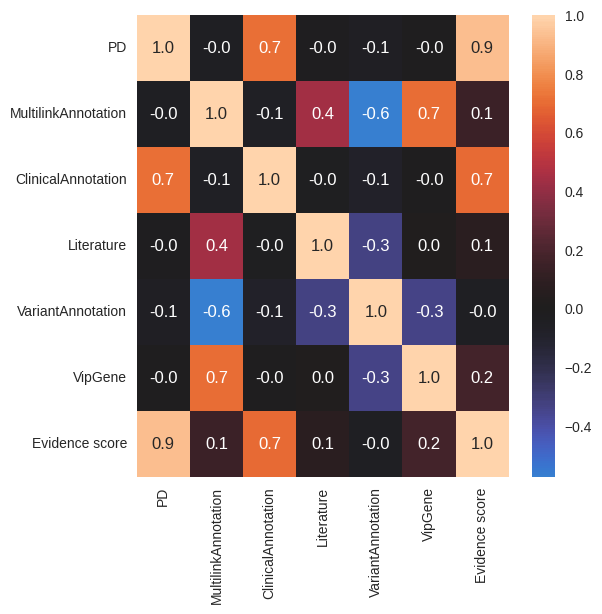

In [47]:
corrmat= gene_disease_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrmat,annot=True, fmt=".1f", center=0)

## FEATURE SELECTION

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_set = gene_disease_df[[ 'VipGene', 'Literature',	'MultilinkAnnotation',	'VariantAnnotation',	'ClinicalAnnotation',	'PD', 'Evidence score']]
target_variable = gene_disease_df["Association"]

# Select the best features
selector = SelectKBest(f_classif, k=3)
selector.fit(feature_set, target_variable)
feature_names = selector.get_support()
feature_names = [x for x, y in zip(feature_set.columns, feature_names) if y]

print("The best features are:", feature_names)

The best features are: ['ClinicalAnnotation', 'PD', 'Evidence score']


## SCALING

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_cols = feature_names
# Separate the real and imaginary parts of the complex columns (for when using fourier transform denoising)
real_cols = [col + '_real' for col in num_cols]
imag_cols = [col + '_imag' for col in num_cols]
gene_disease_df[real_cols] = gene_disease_df[num_cols].apply(lambda x: x.apply(lambda z: z.real))
gene_disease_df[imag_cols] = gene_disease_df[num_cols].apply(lambda x: x.apply(lambda z: z.imag))

num_cols_real_imag = real_cols + imag_cols

# Fit the scaler to the numerical columns
scaler = StandardScaler()
scaled_gene_disease_df = scaler.fit_transform(gene_disease_df[num_cols_real_imag])
scaled_gene_disease_df = pd.DataFrame(scaled_gene_disease_df, columns=num_cols_real_imag)
scaled_gene_disease_df.describe().round(2)



,ClinicalAnnotation_real,PD_real,Evidence score_real,ClinicalAnnotation_imag,PD_imag,Evidence score_imag
count,8112.00,8112.00,8112.00,8112.0,8112.0,8112.0
mean,-0.00,0.00,-0.00,0.0,0.0,0.0
std,1.00,1.00,1.00,0.0,0.0,0.0
min,-0.97,-0.69,-0.72,0.0,0.0,0.0
25%,-0.97,-0.69,-0.72,0.0,0.0,0.0
50%,0.43,-0.69,-0.72,0.0,0.0,0.0
75%,0.43,1.45,1.36,0.0,0.0,0.0
max,1.84,1.45,4.49,0.0,0.0,0.0


In [50]:
"""# Select the numerical columns to scale
num_cols = feature_names

# Fit the scaler to the numerical columns
scaler = StandardScaler()
scaled_gene_disease_df = scaler.fit_transform(gene_disease_df[num_cols])
scaled_gene_disease_df = pd.DataFrame(scaled_gene_disease_df, columns=num_cols)
scaled_gene_disease_df.describe().round(2)"""

'# Select the numerical columns to scale\nnum_cols = feature_names\n\n# Fit the scaler to the numerical columns\nscaler = StandardScaler()\nscaled_gene_disease_df = scaler.fit_transform(gene_disease_df[num_cols])\nscaled_gene_disease_df = pd.DataFrame(scaled_gene_disease_df, columns=num_cols)\nscaled_gene_disease_df.describe().round(2)'

## PRINCIPAL COMPONENT ANALYSIS


In [51]:
# Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_gene_disease_df)
PCA_gene_disease_df = pd.DataFrame(pca.transform(scaled_gene_disease_df), columns=(["col1","col2", "col3"]))

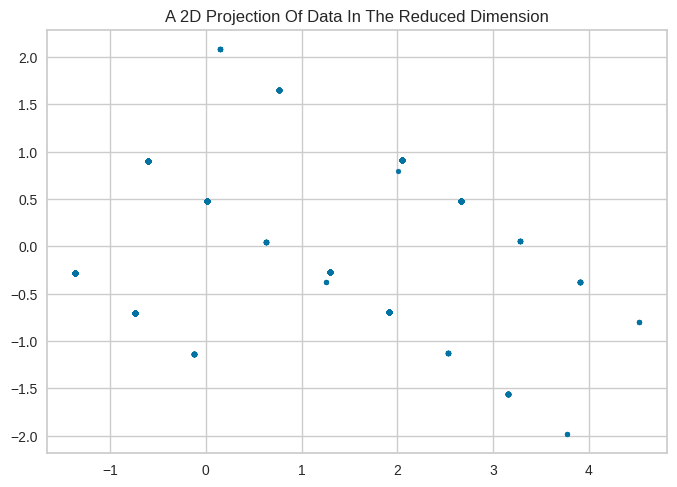

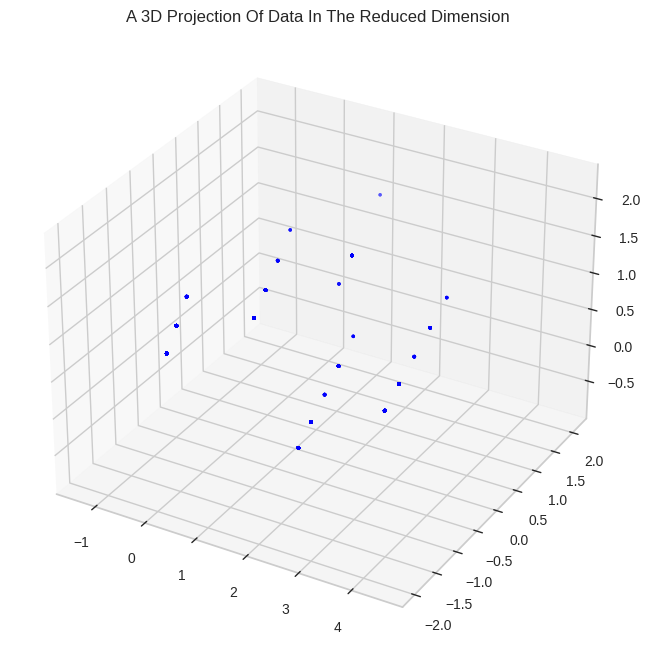

In [52]:
x =PCA_gene_disease_df["col1"]
y =PCA_gene_disease_df["col2"]
z =PCA_gene_disease_df["col3"]

#2d plotting
plt.scatter(x,y, cmap='blue',marker=".")
plt.title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

# 3D Plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="." )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## ELBOW METHOD TO DETERMINE THE NUMBER OF CLUSTERS:


Elbow Method to determine the number of clusters to be formed:


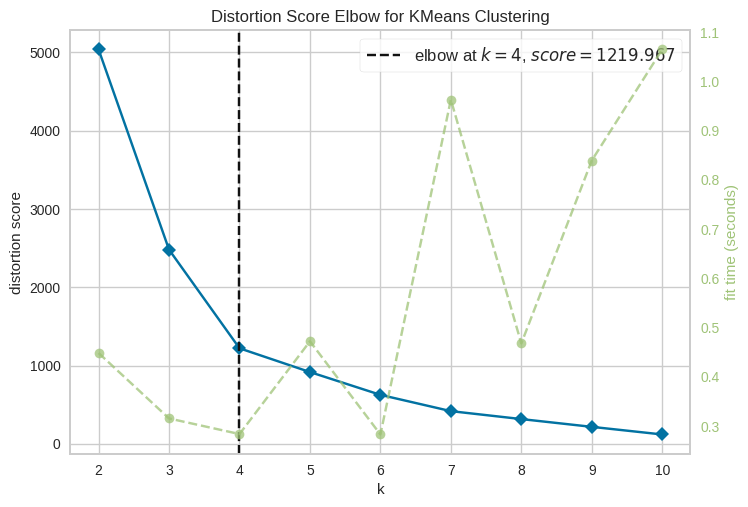

Silhouette Score to determine the number of clusters to be formed:


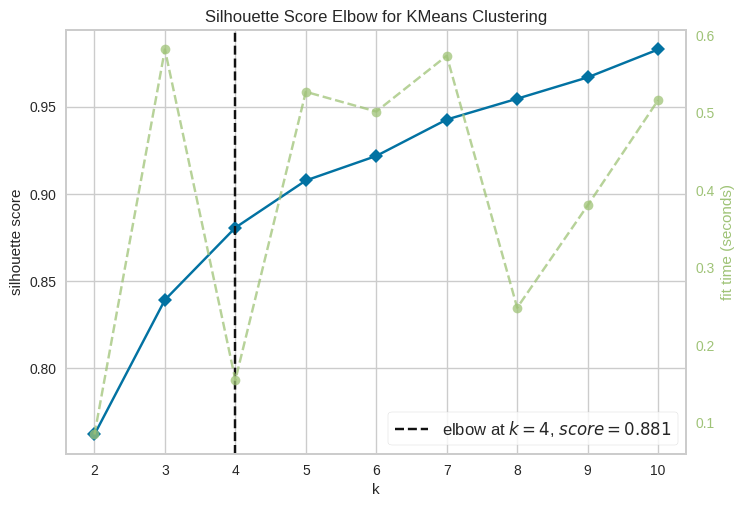

Optimal number of clusters (Elbow Method): 4
Optimal number of clusters (Silhouette Score): 4
Optimal number of clusters (Combined): 4


In [53]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import matplotlib.pyplot as plt

# Elbow Method to determine the number of clusters to be formed
print('Elbow Method to determine the number of clusters to be formed:')
elbow_model = KMeans()
elbow_visualizer = KElbowVisualizer(elbow_model, k=(2, 11))  # Try different values of k
elbow_visualizer.fit(PCA_gene_disease_df)
elbow_visualizer.show()

# Silhouette Score to determine the number of clusters to be formed
print('Silhouette Score to determine the number of clusters to be formed:')
silhouette_model = KMeans()
silhouette_visualizer = KElbowVisualizer(silhouette_model, k=(2, 11), metric='silhouette')
silhouette_visualizer.fit(PCA_gene_disease_df)
silhouette_visualizer.show()

# Get the optimal number of clusters based on the Elbow Method
optimal_n_clusters_elbow = elbow_visualizer.elbow_value_
# Get the optimal number of clusters based on the Silhouette Score
optimal_n_clusters_silhouette = silhouette_visualizer.elbow_value_

print('Optimal number of clusters (Elbow Method):', optimal_n_clusters_elbow)
print('Optimal number of clusters (Silhouette Score):', optimal_n_clusters_silhouette)
optimal_n_clusters_combined = int(np.mean([optimal_n_clusters_elbow, optimal_n_clusters_silhouette]))
print('Optimal number of clusters (Combined):', optimal_n_clusters_combined)



# 5. ANALYSIS:

## K-MEANS CLUSTERING:

In [54]:
# Initialising K-Means cluster
kmeans = KMeans(n_clusters =optimal_n_clusters_combined, init = 'k-means++', n_init = 25, random_state = 123)

#fit model and predict clusters
y_kmeans = kmeans.fit(PCA_gene_disease_df)
KP = kmeans.predict(PCA_gene_disease_df)
PCA_gene_disease_df["kmeans_Clusters"] = KP

#Adding the Clusters feature to the orignal dataframe.
gene_disease_df["kmeans_Clusters"]= KP

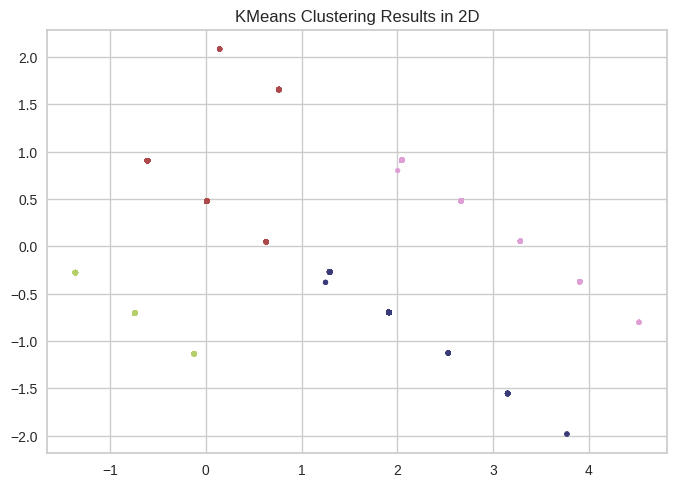

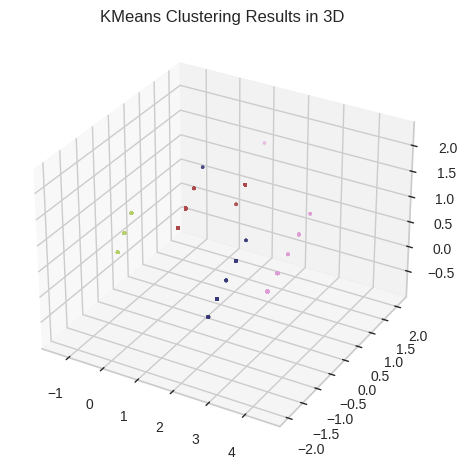

In [55]:
# Visualize the results in 2D
plt.scatter(x, y,c=gene_disease_df["kmeans_Clusters"], cmap='tab20b',marker=".")
plt.title('KMeans Clustering Results in 2D')
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c= PCA_gene_disease_df["kmeans_Clusters"], cmap='tab20b',marker=".")
ax.set_title('KMeans Clustering Results in 3D')
plt.show()

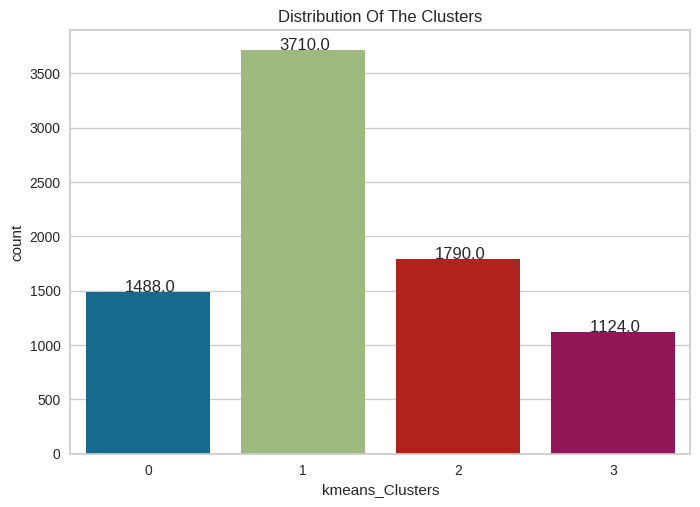

In [56]:
#count and distribution of clusters
fig = sns.countplot(x=gene_disease_df["kmeans_Clusters"])
for p in fig.patches:
   fig.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
fig.set_title("Distribution Of The Clusters")
plt.show()

In [57]:
#Cluster performance analysis
#Silhouette
ss_km = silhouette_score(PCA_gene_disease_df, kmeans.labels_)
print("Silhouette score of the Model:",ss_km)

# Davies-Bouldin Index
dbi_km = davies_bouldin_score(PCA_gene_disease_df,  kmeans.labels_)
print("The  Davies-Bouldin Index of the model:",dbi_km)

#Mutual Information
mi_km = mutual_info_score(KP,  kmeans.labels_)
print("The Mutual Information score of the model:",mi_km)

Silhouette score of the Model: 0.9155222283789369
The  Davies-Bouldin Index of the model: 0.17797714752779603
The Mutual Information score of the model: 1.2761769162981107


## AGGLOMERATIVE CLUSTERING:

In [58]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=optimal_n_clusters_combined)

# fit model and predict clusters
ACP = AC.fit_predict(PCA_gene_disease_df)
PCA_gene_disease_df["Agglomerative_Clusters"] = ACP

#Adding the Clusters feature to the orignal dataframe.
gene_disease_df["Agglomerative_Clusters"]= ACP

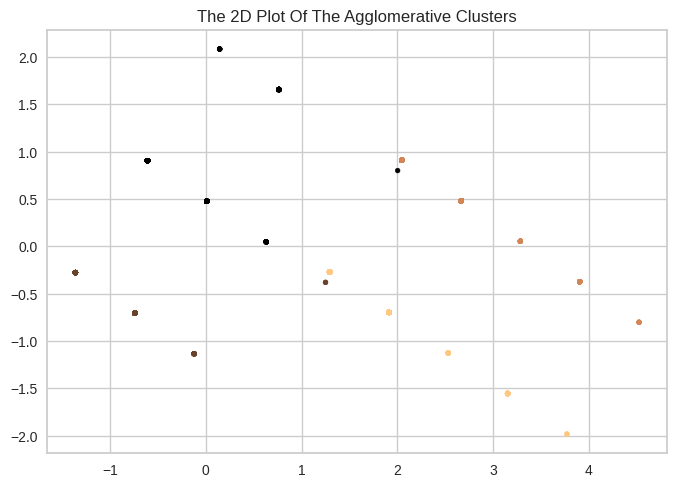

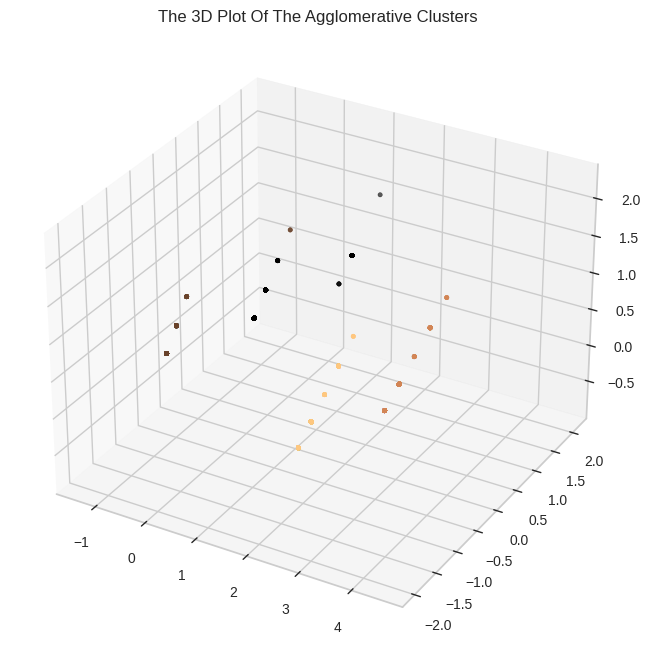

In [59]:
# Plot the data points colored by their cluster labels in 2D
plt.scatter(x,y, c=AC.labels_, cmap='copper',marker=".")
plt.title("The 2D Plot Of The Agglomerative Clusters")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_gene_disease_df["Agglomerative_Clusters"], cmap='copper', marker=".")
ax.set_title("The 3D Plot Of The Agglomerative Clusters")
plt.show()

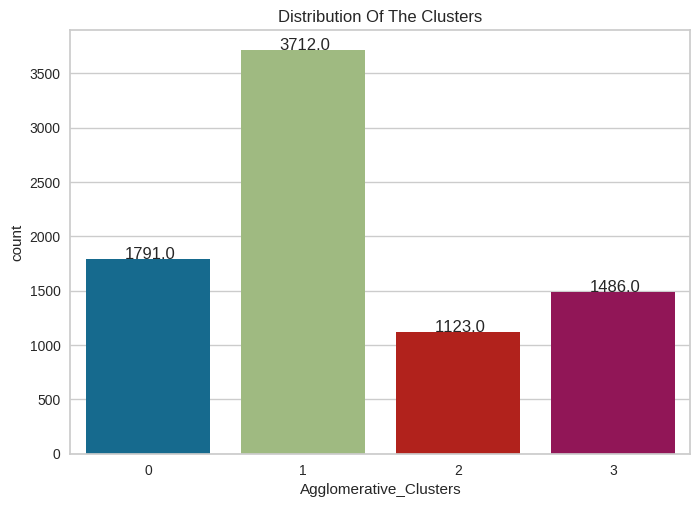

In [60]:
#count and distribution of clusters
ax = sns.countplot(x=gene_disease_df["Agglomerative_Clusters"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters")
plt.show()

In [61]:
#Cluster performance analysis
#Silhouette
ss_ag = silhouette_score(PCA_gene_disease_df, AC.labels_)
print("Silhouette score of the Model:",ss_ag)

# Davies-Bouldin Index
dbi_ag = davies_bouldin_score(PCA_gene_disease_df, AC.labels_)
print("The  Davies-Bouldin Index of the model:",dbi_ag)

#Mutual Information
mi_ag = mutual_info_score(ACP, AC.labels_)
print("The Mutual Information score of the model:",mi_ag)

Silhouette score of the Model: 0.9244193734876794
The  Davies-Bouldin Index of the model: 0.1525820642853151
The Mutual Information score of the model: 1.2758939863580752


## BIRCH CLUSTERING:

In [62]:
from sklearn.cluster import Birch

#Birch model
birch=Birch(n_clusters=optimal_n_clusters_combined,threshold=1).fit(PCA_gene_disease_df)

# Get the predictions
BP=birch.predict(PCA_gene_disease_df)
PCA_gene_disease_df["Birch_Clusters"] = BP

#Adding the Clusters feature to the orignal dataframe.
gene_disease_df["Birch_Clusters"]= BP

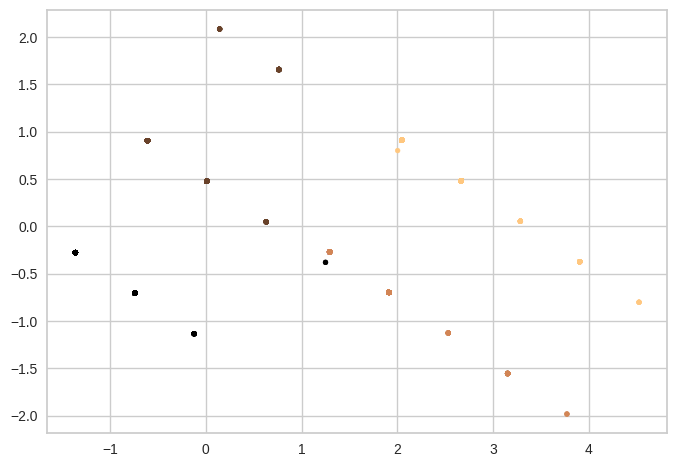

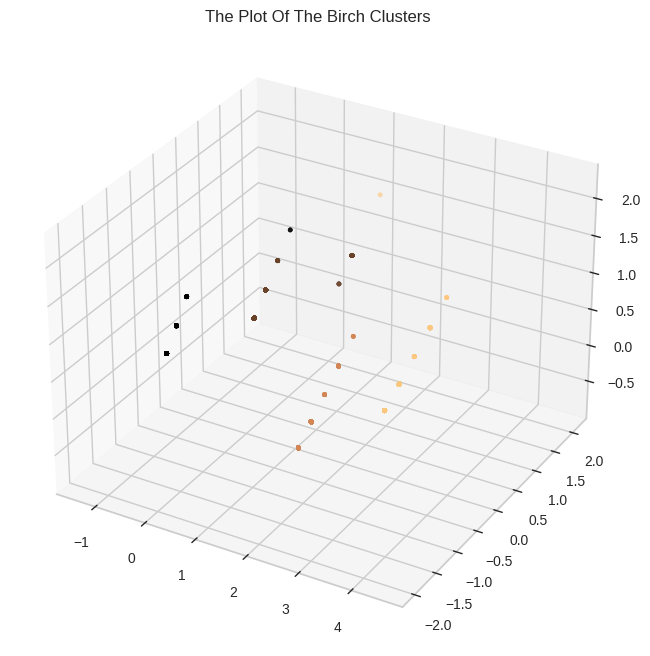

In [63]:

# Plot the data points colored by their cluster labels in 2D
plt.scatter(x,y, c=birch.labels_, cmap='copper',marker=".")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=gene_disease_df["Birch_Clusters"], cmap='copper', marker=".")
ax.set_title("The Plot Of The Birch Clusters")
plt.show()

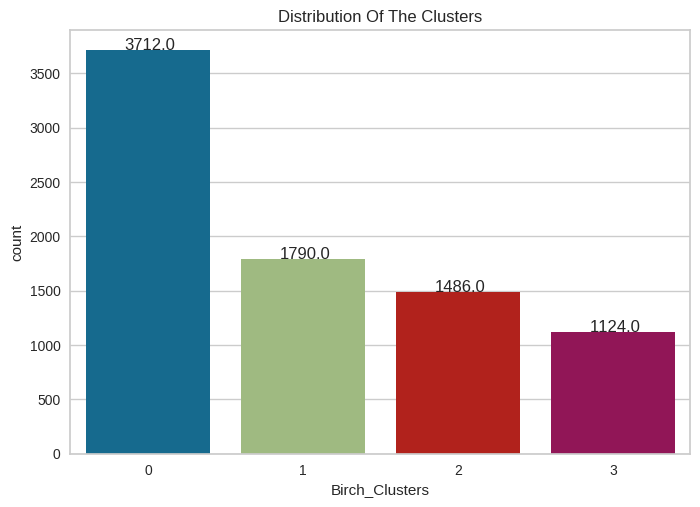

In [64]:
#count and distribution of clusters
ax = sns.countplot(x=gene_disease_df["Birch_Clusters"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters")
plt.show()

In [65]:
#Cluster performance analysis
#Silhouette
ss_bm = silhouette_score(PCA_gene_disease_df, birch.labels_)
print("Silhouette score of the Model:",ss_bm)

# Davies-Bouldin Index
dbi_bm = davies_bouldin_score(PCA_gene_disease_df, birch.labels_)
print("The  Davies-Bouldin Index of the model:",dbi_bm)

#Mutual Information
mi_bm = mutual_info_score(BP,  birch.labels_)
print("The Mutual Information score of the model:",mi_bm)

Silhouette score of the Model: 0.9302284957605697
The  Davies-Bouldin Index of the model: 0.13768457468169837
The Mutual Information score of the model: 1.2759514378025802


## GAUSSIAN MIXTURE MODEL CLUSTERING

In [66]:
from sklearn.mixture import GaussianMixture

#GMM model
gmm=GaussianMixture(n_components=optimal_n_clusters_combined, covariance_type='full').fit(PCA_gene_disease_df)

# Get the predictions
GP=gmm.predict(PCA_gene_disease_df)
PCA_gene_disease_df["GMM_Clusters"] = GP

#Adding the Clusters feature to the orignal dataframe.
gene_disease_df["GMM_Clusters"]= GP

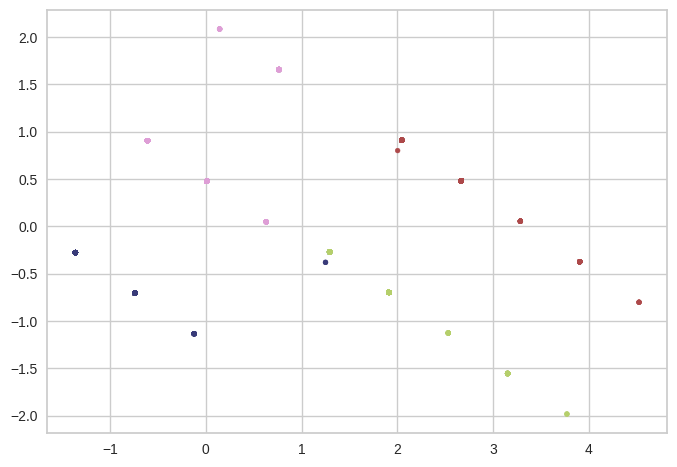

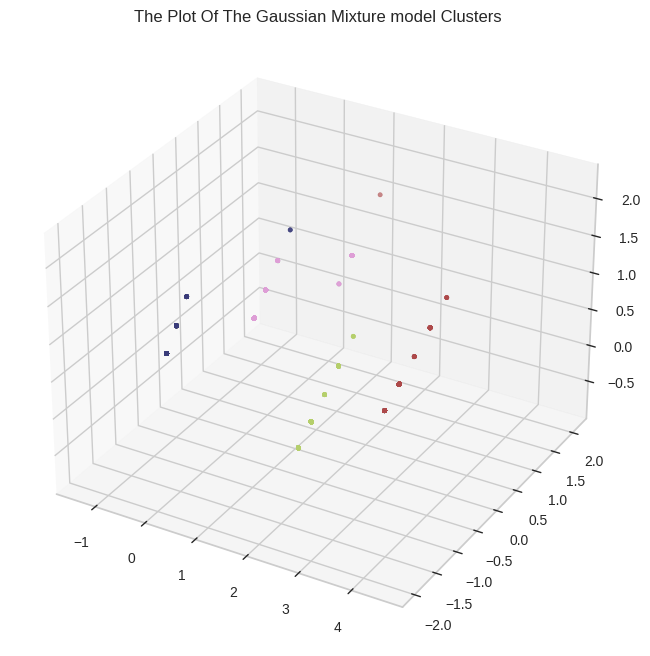

In [67]:


# Plot the data points colored by their cluster labels in 2D
plt.scatter(x,y, c=GP, cmap='tab20b',marker=".")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=gene_disease_df["GMM_Clusters"], cmap='tab20b', marker=".")
ax.set_title("The Plot Of The Gaussian Mixture model Clusters")
plt.show()

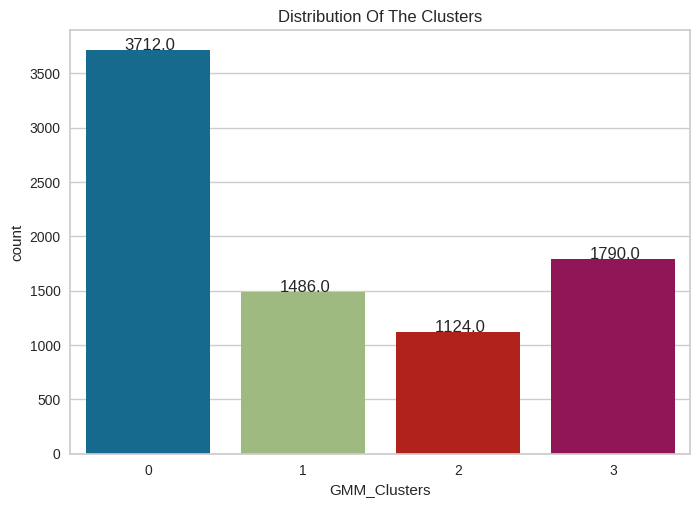

In [68]:
#count and distribution of clusters
ax = sns.countplot(x=gene_disease_df["GMM_Clusters"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters")
plt.show()

In [69]:
#Cluster performance analysis
#Silhouette
ss_gm = silhouette_score(PCA_gene_disease_df, GP)
print("Silhouette score of the Model:",ss_gm)

# Davies-Bouldin Index
dbi_gm = davies_bouldin_score(PCA_gene_disease_df, GP)
print("The  Davies-Bouldin Index of the model:",dbi_gm)

#Mutual Information
mi_gm = mutual_info_score( ACP,  GP)
print("The Mutual Information score of the model:",mi_gm)

Silhouette score of the Model: 0.9475643237358212
The  Davies-Bouldin Index of the model: 0.1004066454336699
The Mutual Information score of the model: 1.2749048093291528


## AGGLOMERATIVE WITH DIFFERENT WARDS

In [70]:
from sklearn.cluster import AgglomerativeClustering


# Agglomerative Clustering model with different linkage methods
n_clusters = optimal_n_clusters_combined

# Linkage method: 'ward' (default)
ac_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_ward = ac_ward.fit_predict(PCA_gene_disease_df)

# Linkage method: 'complete'
ac_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels_complete = ac_complete.fit_predict(PCA_gene_disease_df)

# Linkage method: 'average'
ac_average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels_average = ac_average.fit_predict(PCA_gene_disease_df)

# Linkage method: 'single'
ac_single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
labels_single = ac_single.fit_predict(PCA_gene_disease_df)

# Adding the Clusters feature to the original dataframe for each linkage method
PCA_gene_disease_df["Agglomerative_Clusters_Ward"] = labels_ward
PCA_gene_disease_df["Agglomerative_Clusters_Complete"] = labels_complete
PCA_gene_disease_df["Agglomerative_Clusters_Average"] = labels_average
PCA_gene_disease_df["Agglomerative_Clusters_Single"] = labels_single

gene_disease_df["Agglomerative_Clusters_Ward"] = labels_ward
gene_disease_df["Agglomerative_Clusters_Complete"] = labels_complete
gene_disease_df["Agglomerative_Clusters_Average"] = labels_average
gene_disease_df["Agglomerative_Clusters_Single"] = labels_single

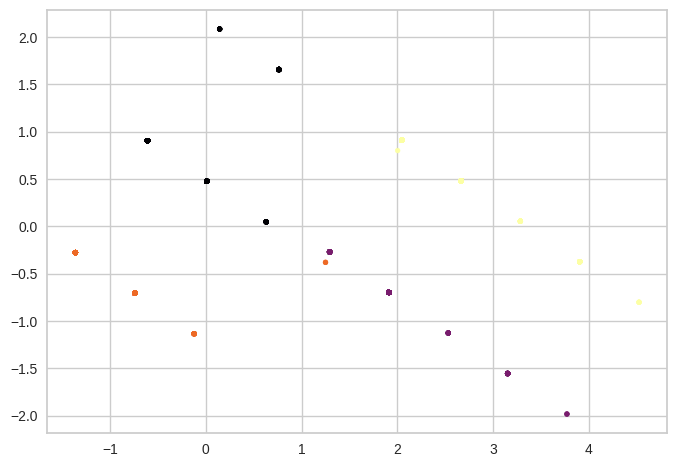

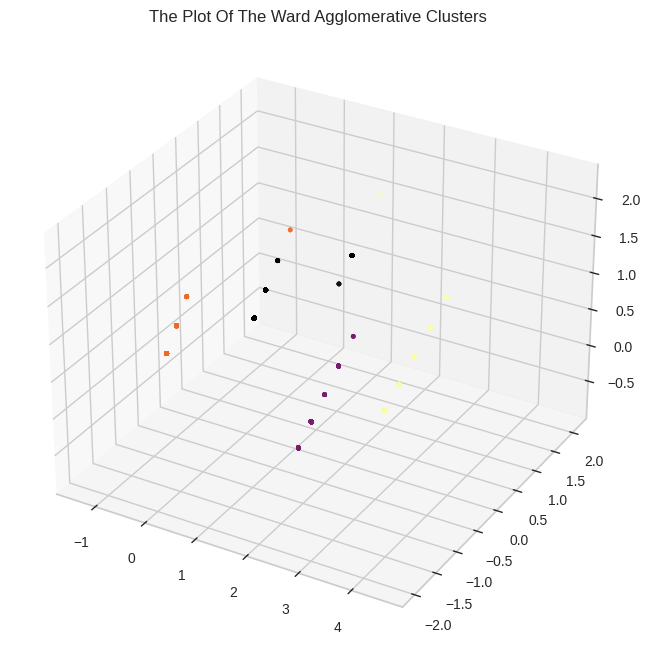

In [71]:
# Linkage method: 'ward' (default)
# Plot the data points colored by their cluster labels in 2D
plt.scatter(x, y, c=labels_ward, cmap='inferno', marker=".")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=labels_ward, cmap='inferno', marker=".")
ax.set_title("The Plot Of The Ward Agglomerative Clusters")
plt.show()


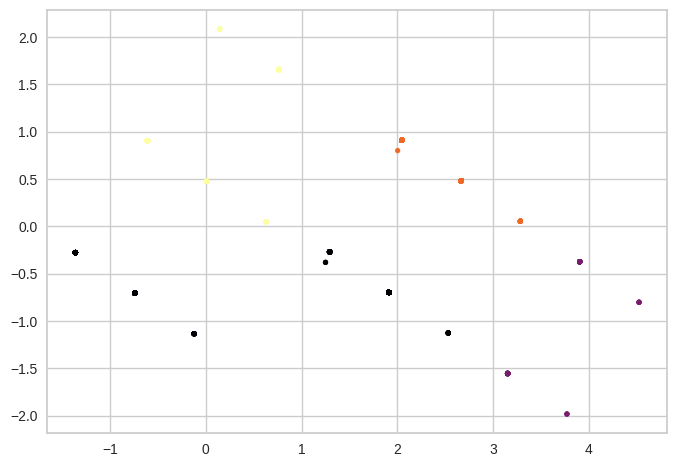

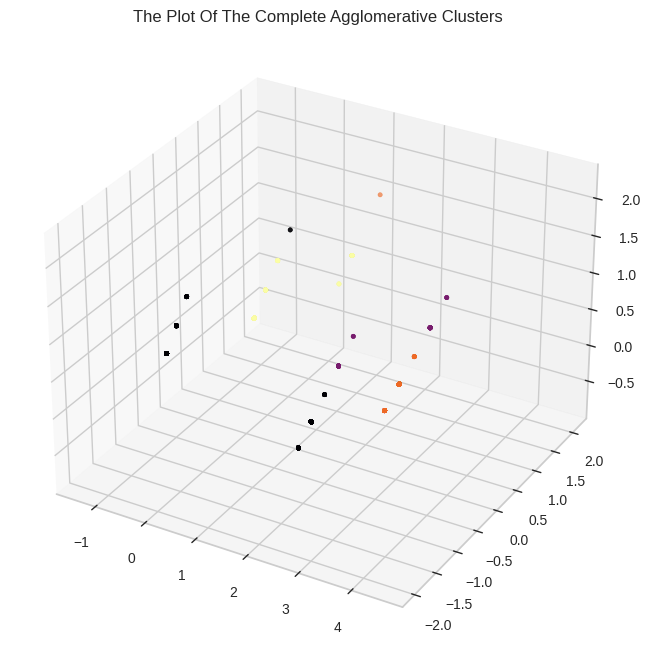

In [72]:
# Linkage method: 'complete'
# Plot the data points colored by their cluster labels in 2D
plt.scatter(x, y, c=labels_complete, cmap='inferno', marker=".")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=labels_complete, cmap='inferno', marker=".")
ax.set_title("The Plot Of The Complete Agglomerative Clusters")
plt.show()

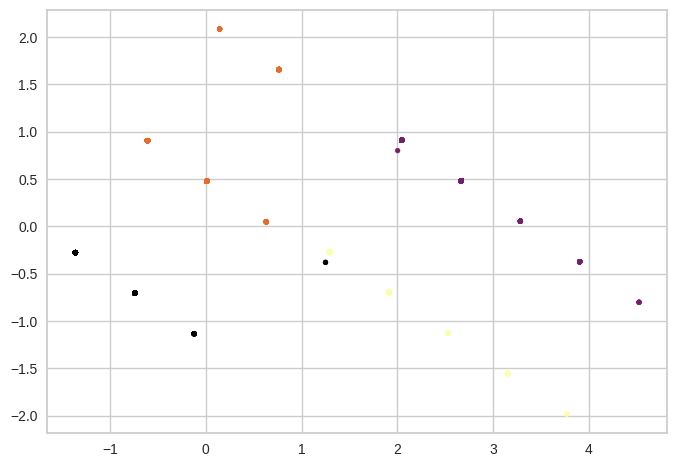

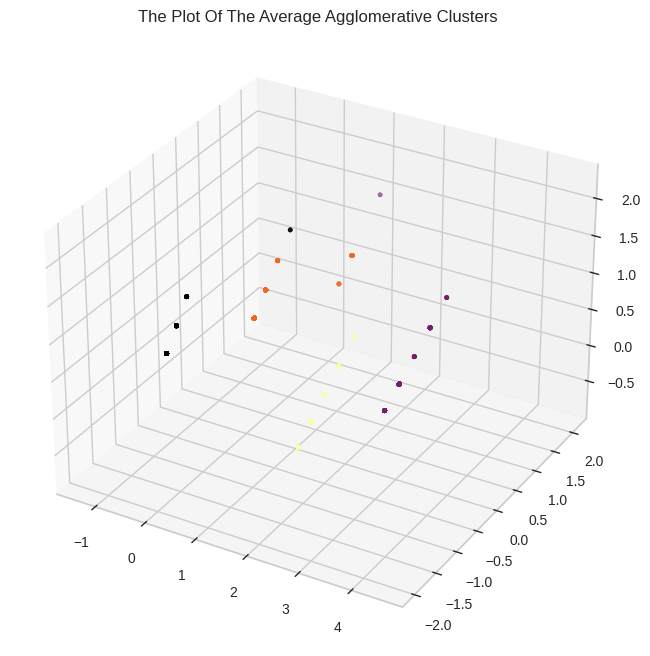

In [73]:
# Linkage method: 'average'
# Plot the data points colored by their cluster labels in 2D
plt.scatter(x, y, c=labels_average, cmap='inferno', marker=".")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=labels_average, cmap='inferno', marker=".")
ax.set_title("The Plot Of The Average Agglomerative Clusters")
plt.show()

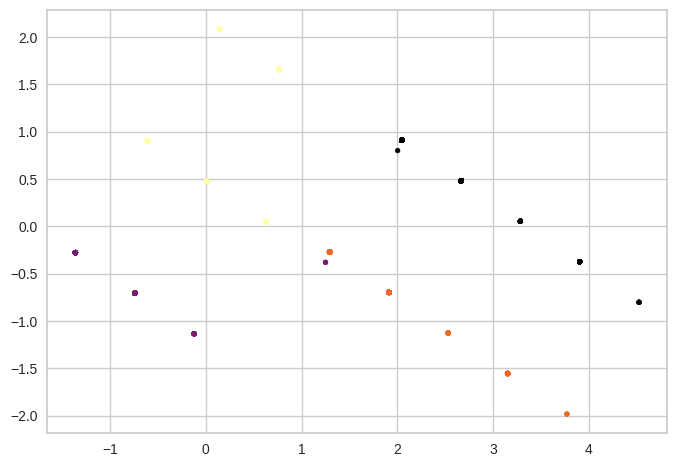

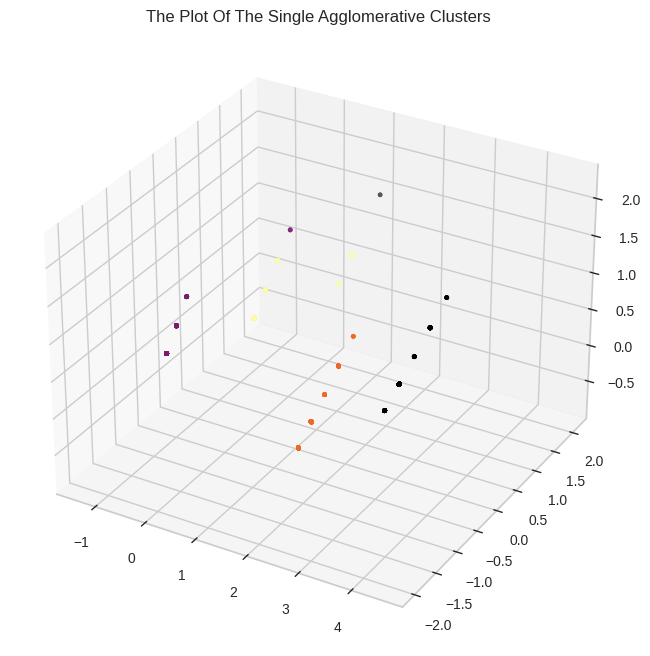

In [74]:
# Linkage method: 'single'
# Plot the data points colored by their cluster labels in 2D
plt.scatter(x, y, c=labels_single, cmap='inferno', marker=".")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=labels_single, cmap='inferno', marker=".")
ax.set_title("The Plot Of The Single Agglomerative Clusters")
plt.show()

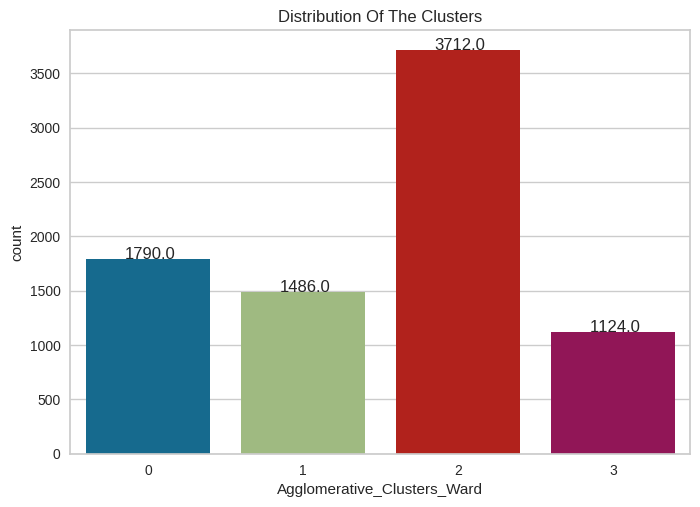

In [75]:
#count and distribution of clusters
ax = sns.countplot(x=gene_disease_df["Agglomerative_Clusters_Ward"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters")
plt.show()

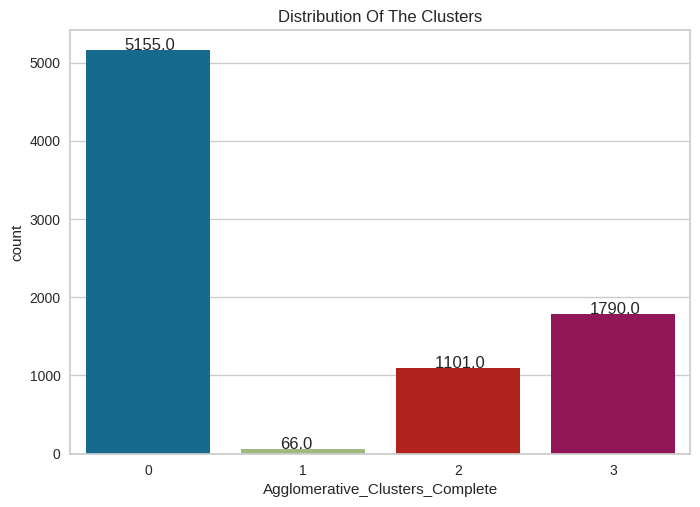

In [76]:
#count and distribution of clusters
ax = sns.countplot(x=gene_disease_df["Agglomerative_Clusters_Complete"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters")
plt.show()

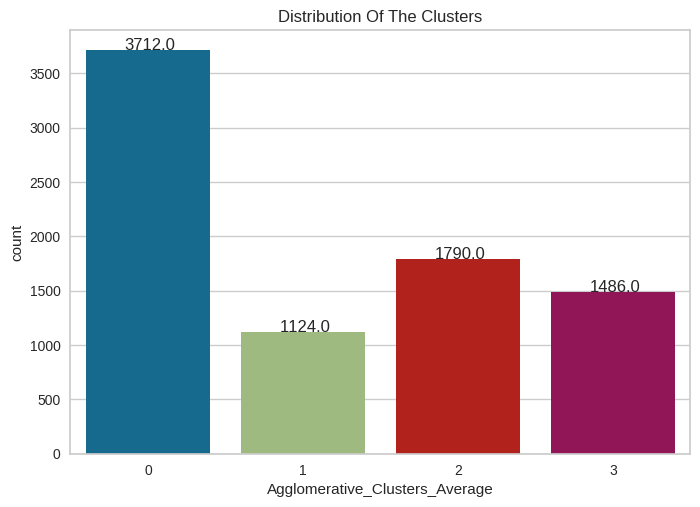

In [77]:
#count and distribution of clusters
ax = sns.countplot(x=gene_disease_df["Agglomerative_Clusters_Average"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters")
plt.show()

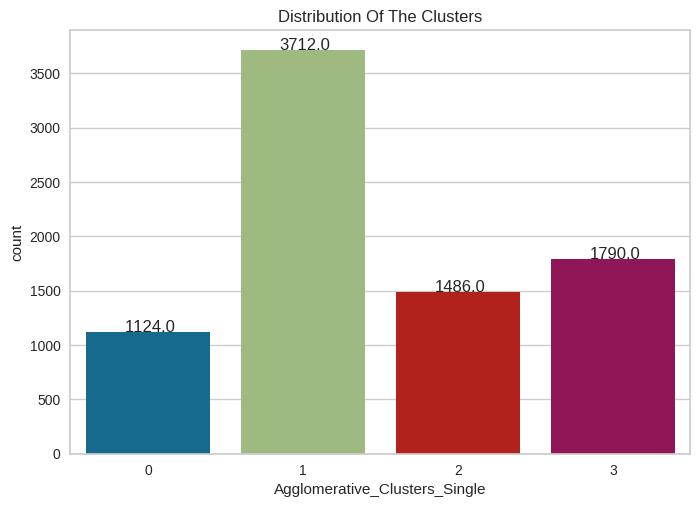

In [78]:
#count and distribution of clusters
ax = sns.countplot(x=gene_disease_df["Agglomerative_Clusters_Single"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters")
plt.show()

In [79]:
# Cluster performance analysis
# Silhouette
ss_ward = silhouette_score(PCA_gene_disease_df, labels_ward)
print("Silhouette score of the Ward linkage model:", ss_ward)
ss_complete = silhouette_score(PCA_gene_disease_df, labels_complete)
print("Silhouette score of the Complete linkage model:", ss_complete)
ss_average = silhouette_score(PCA_gene_disease_df, labels_average)
print("Silhouette score of the Average linkage model:", ss_average)
ss_single = silhouette_score(PCA_gene_disease_df, labels_single)
print("Silhouette score of the Single linkage model:", ss_single)

# Davies-Bouldin Index
dbi_ward = davies_bouldin_score(PCA_gene_disease_df, labels_ward)
print("The Davies-Bouldin Index of the Ward linkage model:", dbi_ward)
dbi_complete = davies_bouldin_score(PCA_gene_disease_df, labels_complete)
print("The Davies-Bouldin Index of the Complete linkage model:", dbi_complete)
dbi_average = davies_bouldin_score(PCA_gene_disease_df, labels_average)
print("The Davies-Bouldin Index of the Average linkage model:", dbi_average)
dbi_single = davies_bouldin_score(PCA_gene_disease_df, labels_single)
print("The Davies-Bouldin Index of the Single linkage model:", dbi_single)

# Mutual Information
mi_ward = mutual_info_score(labels_ward,  ac_ward.labels_ )
print("The Mutual Information score of the Ward linkage model:", mi_ward)
mi_complete = mutual_info_score(labels_complete, ac_complete.labels_ )
print("The Mutual Information score of the Complete linkage model:", mi_complete)
mi_average = mutual_info_score( labels_average, ac_average.labels_)
print("The Mutual Information score of the Average linkage model:", mi_average)
mi_single = mutual_info_score(labels_single, ac_single.labels_)
print("The Mutual Information score of the Single linkage model:", mi_single)

Silhouette score of the Ward linkage model: 0.9633873999605732
Silhouette score of the Complete linkage model: 0.6495662437769529
Silhouette score of the Average linkage model: 0.9633873999605732
Silhouette score of the Single linkage model: 0.9633873999605732
The Davies-Bouldin Index of the Ward linkage model: 0.07363812514440557
The Davies-Bouldin Index of the Complete linkage model: 0.7154498395329841
The Davies-Bouldin Index of the Average linkage model: 0.07363812514440557
The Davies-Bouldin Index of the Single linkage model: 0.07363812514440557
The Mutual Information score of the Ward linkage model: 1.2759514378025802
The Mutual Information score of the Complete linkage model: 0.9317642228569851
The Mutual Information score of the Average linkage model: 1.2759514378025802
The Mutual Information score of the Single linkage model: 1.2759514378025802


## DECISION TREE

In [80]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

feature_columns=['VipGene', 'Literature',	'MultilinkAnnotation',	'VariantAnnotation',	'ClinicalAnnotation',	'PD', 'Evidence score']
target_column=['Association']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(gene_disease_df[feature_columns], gene_disease_df[target_column], test_size=0.25, random_state=42)
#Convert the target variable into numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20]
}


grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# The best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# The classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
best_dt_classifier.fit(X_train, y_train)
best_dt_y_pred = best_dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, best_dt_y_pred)
print("Best Accuracy:", accuracy)


Best Accuracy: 0.5759368836291914


In [82]:
from sklearn.metrics import precision_score, recall_score

# Calculate the precision and recall
precision = precision_score(y_test, best_dt_y_pred, average='weighted')
recall = recall_score(y_test, best_dt_y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.472814003000516
Recall: 0.5759368836291914


In [83]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, best_dt_y_pred, average='weighted')
print("F1 score:", f1)


F1 score: 0.4469476933647744


In [84]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(dt_classifier, X_train, y_train_encoded, cv=5)
print("Cross validation Score:", scores_dt.mean())

Cross validation Score: 0.5634446762963283


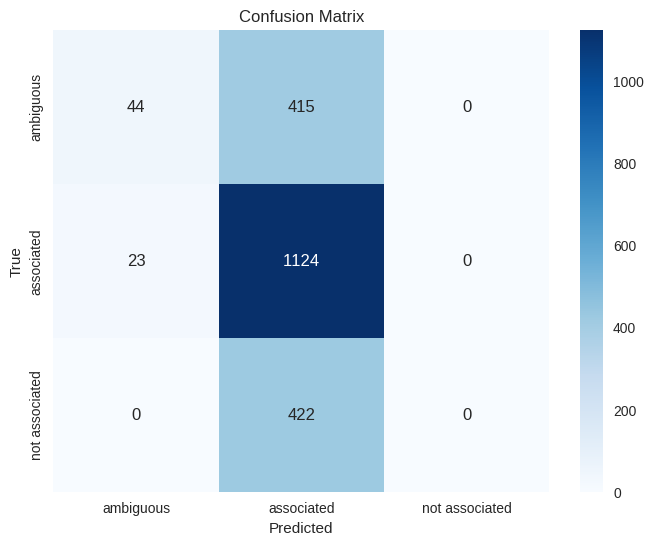

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, best_dt_y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


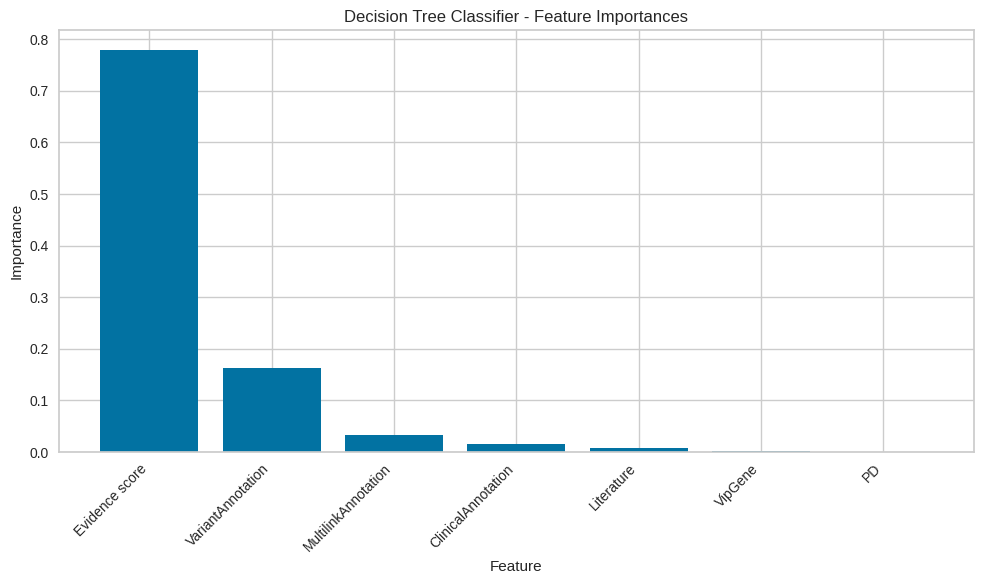

In [86]:
import matplotlib.pyplot as plt

# Get the feature importances
feature_importances = best_dt_classifier.feature_importances_
feature_names = X_train.columns

# Sort the features and their importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Classifier - Feature Importances')
plt.tight_layout()
plt.show()


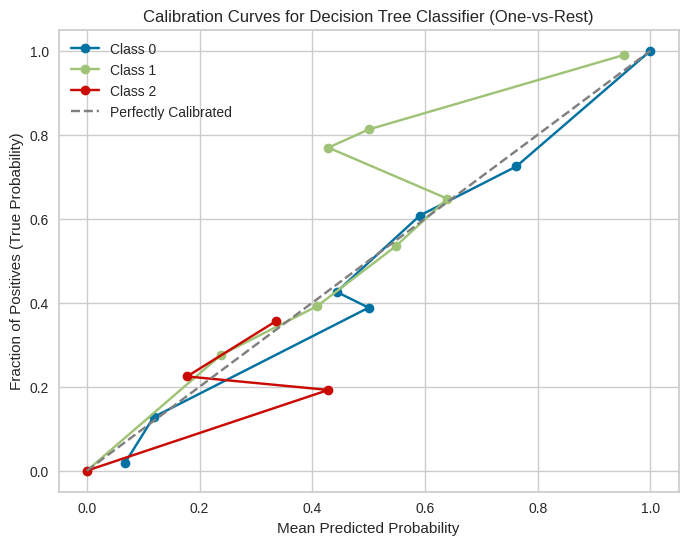

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize

best_dt_classifier.fit(X_train, y_train_encoded)

# Predict probabilities for all classes
y_prob_all_classes = best_dt_classifier.predict_proba(X_test)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
calibration_curves = []
for class_label in np.unique(y_train_encoded):
    true_prob, true_labels = calibration_curve(y_test_bin[:, class_label], y_prob_all_classes[:, class_label], n_bins=10)
    calibration_curves.append((true_prob, true_labels))

# Plot the calibration curves for each class
plt.figure(figsize=(8, 6))
for i, (true_prob, true_labels) in enumerate(calibration_curves):
    plt.plot(true_prob, true_labels, marker='o', linestyle='-', label=f'Class {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (True Probability)')
plt.title('Calibration Curves for Decision Tree Classifier (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


## RANDOM FOREST

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# The classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators,
                                            max_depth=best_max_depth,
                                            min_samples_split=best_min_samples_split,
                                            min_samples_leaf=best_min_samples_leaf,
                                            random_state=42)

best_rf_classifier.fit(X_train, y_train)
best_rf_y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, best_rf_y_pred)
print("Best Accuracy:", accuracy)


Best Accuracy: 0.5784023668639053


In [89]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, best_rf_y_pred, average='weighted')
recall = recall_score(y_test, best_rf_y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.48262415790644453
Recall: 0.5784023668639053


In [90]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, best_rf_y_pred, average='weighted')
print("F1 score:", f1)

F1 score: 0.44970417282612646


In [91]:
scores_rf = cross_val_score(rf_classifier, X_train, y_train_encoded, cv=5)
print("Cross validation Score:", scores_rf.mean())

Cross validation Score: 0.5627867815594862


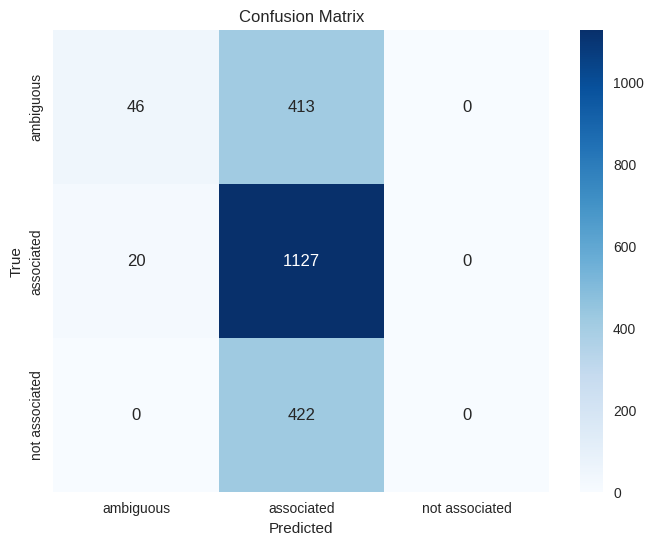

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, best_rf_y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


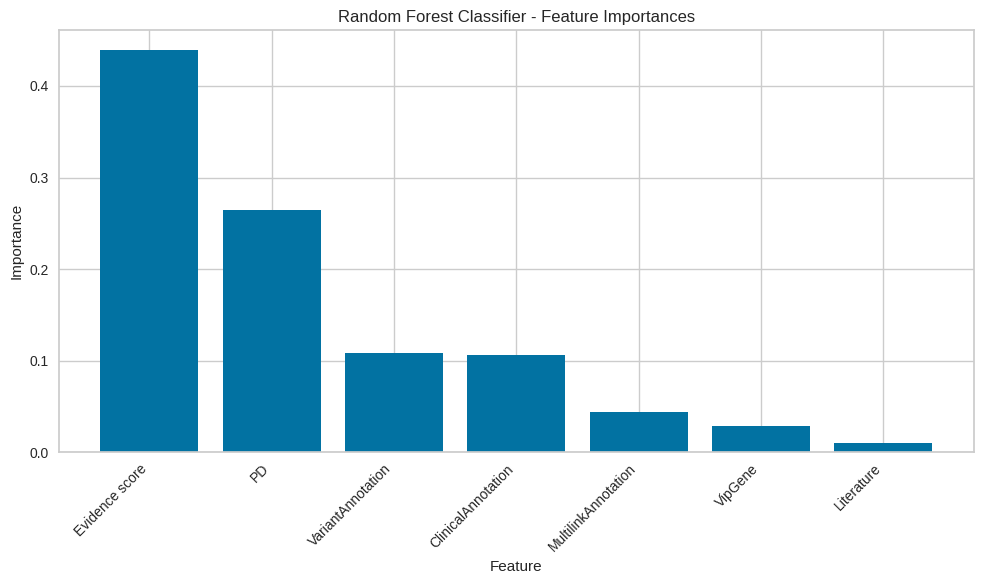

In [93]:
import matplotlib.pyplot as plt

# Get the feature importances
feature_importances = best_rf_classifier.feature_importances_
feature_names = X_train.columns
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Classifier - Feature Importances')
plt.tight_layout()
plt.show()


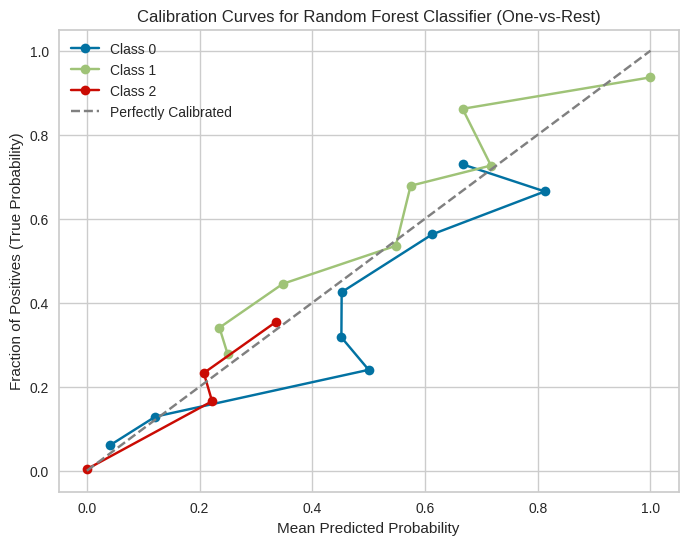

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize

# Fit the classifier with the best hyperparameters
best_dt_classifier.fit(X_train, y_train_encoded)
y_prob_all_classes = best_rf_classifier.predict_proba(X_test)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
calibration_curves = []
for class_label in np.unique(y_train_encoded):
    true_prob, true_labels = calibration_curve(y_test_bin[:, class_label], y_prob_all_classes[:, class_label], n_bins=10)
    calibration_curves.append((true_prob, true_labels))

# Plot the calibration curves for each class
plt.figure(figsize=(8, 6))
for i, (true_prob, true_labels) in enumerate(calibration_curves):
    plt.plot(true_prob, true_labels, marker='o', linestyle='-', label=f'Class {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (True Probability)')
plt.title('Calibration Curves for Random Forest Classifier (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


## SUPPORT VECTOR MACHINE

In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the SVM classifier
svm_classifier = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10],                          # Varying regularization parameter C
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Varying kernel functions
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

# The classifier with the best hyperparameters
best_svm_classifier = SVC(C=best_C, kernel=best_kernel, random_state=42)
best_svm_classifier.fit(X_train, y_train)
best_svm_y_pred = best_svm_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, best_svm_y_pred)
print("Best Accuracy:", accuracy)


Best Accuracy: 0.5764299802761341


In [96]:
from sklearn.metrics import precision_score, recall_score

# Calculate the precision and recall
precision = precision_score(y_test, best_svm_y_pred, average='weighted')
recall = recall_score(y_test, best_svm_y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.47883472843604175
Recall: 0.5764299802761341


In [97]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, best_svm_y_pred, average='weighted')
print("F1 score:", f1)

F1 score: 0.4453751049086804


In [98]:
scores_svm = cross_val_score(svm_classifier, X_train, y_train_encoded, cv=5)
print("Cross validation Score:", scores_svm.mean())

Cross validation Score: 0.5641018952990529


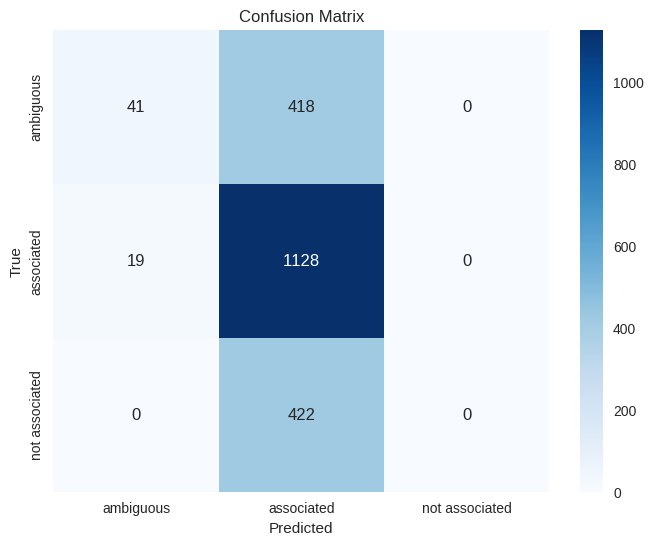

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, best_svm_y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


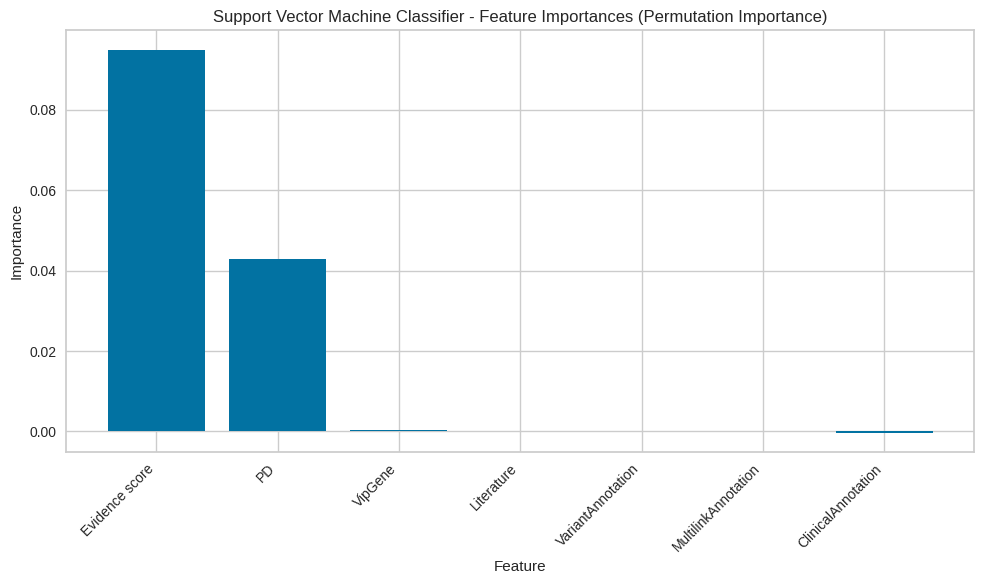

In [100]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(best_svm_classifier, X_train, y_train, n_repeats=10, random_state=42)

# Sort the importances in descending order
sorted_indices = result.importances_mean.argsort()[::-1]
sorted_importances = result.importances_mean[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), sorted_importances)
plt.xticks(range(len(feature_names)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Support Vector Machine Classifier - Feature Importances (Permutation Importance)')
plt.tight_layout()
plt.show()


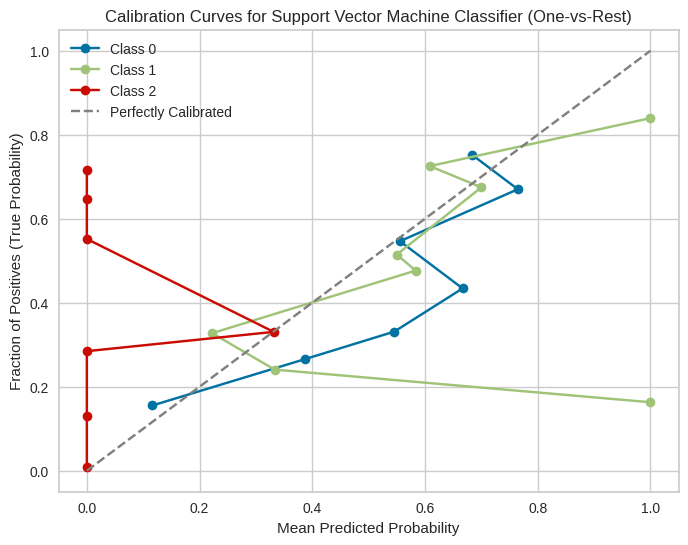

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize

# Fit the classifier with the best hyperparameters
best_svm_classifier.fit(X_train, y_train_encoded)
best_svm_classifier = SVC(probability=True, C=1.0, kernel='rbf')
best_svm_classifier.fit(X_train, y_train_encoded)

y_prob_all_classes = best_svm_classifier.predict_proba(X_test)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
calibration_curves = []
for class_label in np.unique(y_train_encoded):
    true_prob, true_labels = calibration_curve(y_test_bin[:, class_label], y_prob_all_classes[:, class_label], n_bins=10)
    calibration_curves.append((true_prob, true_labels))

# Plot the calibration curves for each class
plt.figure(figsize=(8, 6))
for i, (true_prob, true_labels) in enumerate(calibration_curves):
    plt.plot(true_prob, true_labels, marker='o', linestyle='-', label=f'Class {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (True Probability)')
plt.title('Calibration Curves for Support Vector Machine Classifier (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


## ADA-BOOST

In [102]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# The AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],         # Varying the number of weak learners
    'learning_rate': [0.1, 0.5, 1.0]       # Varying the learning rate
}
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']

# The classifier with the best hyperparameters
best_adaboost_classifier = AdaBoostClassifier(n_estimators=best_n_estimators,
                                              learning_rate=best_learning_rate,
                                              random_state=42)
best_adaboost_classifier.fit(X_train, y_train)
best_adaboost_y_pred = best_adaboost_classifier.predict(X_test)


accuracy = accuracy_score(y_test, best_adaboost_y_pred)
print("Best Accuracy:", accuracy)



Best Accuracy: 0.5655818540433925


In [103]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, best_adaboost_y_pred, average='weighted')
recall = recall_score(y_test, best_adaboost_y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.3198828336231613
Recall: 0.5655818540433925


In [104]:
f1 = f1_score(y_test, best_adaboost_y_pred, average='weighted')
print("F1 score:", f1)

F1 score: 0.40864402304741493


In [105]:
scores_adaboost = cross_val_score(adaboost_classifier, X_train, y_train_encoded, cv=5)
print("Cross validation Score:", scores_adaboost.mean())


Cross validation Score: 0.5516116258703455


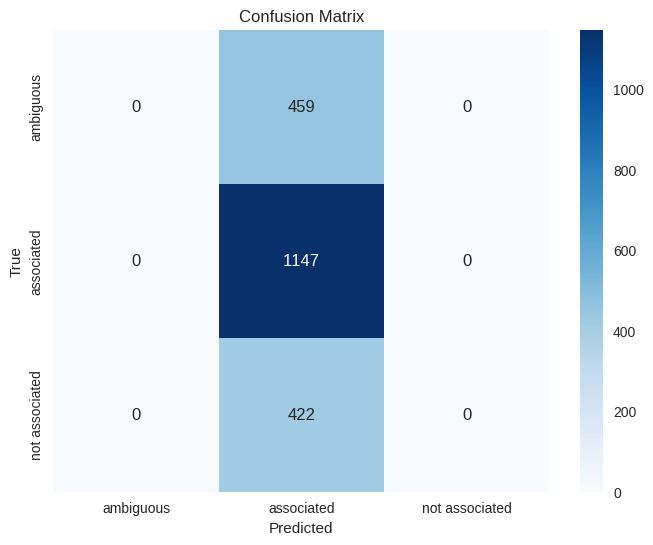

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, best_adaboost_y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


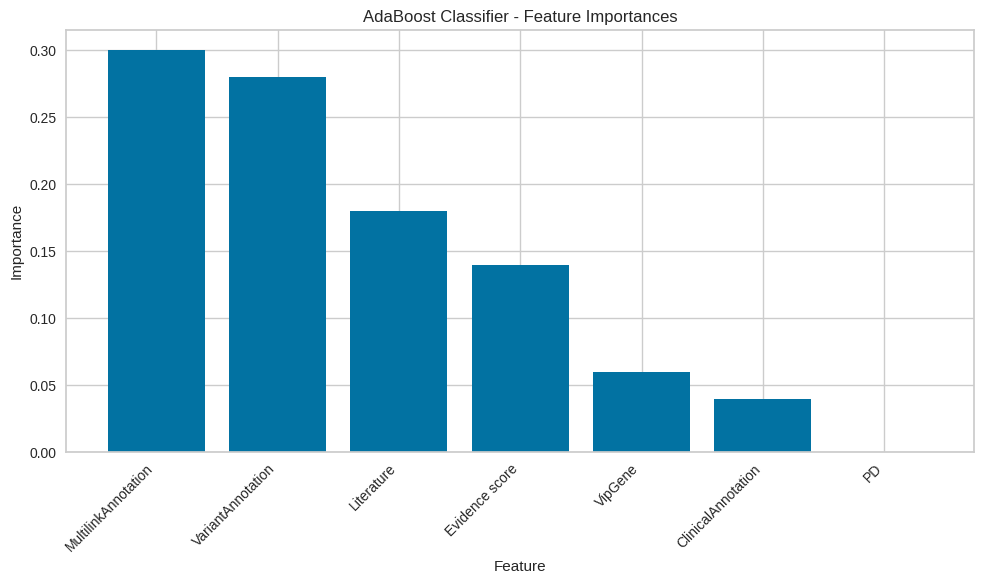

In [107]:
import matplotlib.pyplot as plt

# Get the feature importances
feature_importances = best_adaboost_classifier.feature_importances_
feature_names = X_train.columns
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.tight_layout()
plt.show()


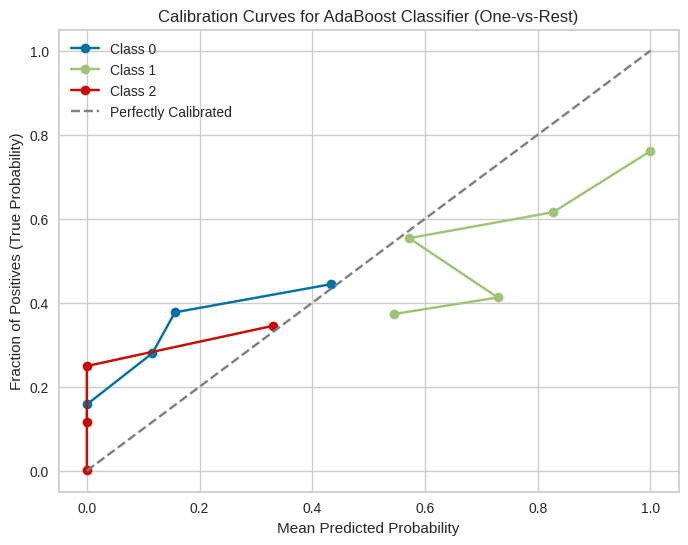

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize

# Fit the classifier with the best hyperparameters
best_dt_classifier.fit(X_train, y_train_encoded)
y_prob_all_classes = best_adaboost_classifier.predict_proba(X_test)

# Binarize the true labels (one-vs-rest)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
calibration_curves = []
for class_label in np.unique(y_train_encoded):
    true_prob, true_labels = calibration_curve(y_test_bin[:, class_label], y_prob_all_classes[:, class_label], n_bins=10)
    calibration_curves.append((true_prob, true_labels))

# Plot the calibration curves for each class
plt.figure(figsize=(8, 6))
for i, (true_prob, true_labels) in enumerate(calibration_curves):
    plt.plot(true_prob, true_labels, marker='o', linestyle='-', label=f'Class {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (True Probability)')
plt.title('Calibration Curves for AdaBoost Classifier (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


## XG BOOST

In [109]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],          # Varying the number of boosting rounds
    'max_depth': [3, 5, 7],                  # Varying the maximum depth of trees
    'learning_rate': [0.1, 0.01, 0.001]      # Varying the learning rate
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train_encoded)

# Get the best hyperparameters found by GridSearchCV
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_learning_rate = grid_search.best_params_['learning_rate']
best_xgb_classifier = XGBClassifier(n_estimators=best_n_estimators,
                                    max_depth=best_max_depth,
                                    learning_rate=best_learning_rate,
                                    random_state=42)

best_xgb_classifier.fit(X_train, y_train_encoded)
best_xgb_y_pred = best_xgb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test_encoded, best_xgb_y_pred)
print("Best Accuracy:", accuracy)


Best Accuracy: 0.5759368836291914


In [110]:
from sklearn.metrics import precision_score, recall_score

# Calculate the precision and recall
precision = precision_score( y_test_encoded, best_xgb_y_pred, average='weighted')
recall = recall_score(y_test_encoded, best_xgb_y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.4738632150403772
Recall: 0.5759368836291914


In [111]:
f1 = f1_score(y_test_encoded, best_xgb_y_pred, average='weighted')
print("F1 score:", f1)

F1 score: 0.4463290000957121


In [112]:
scores_xgboost = cross_val_score(xgb_classifier, X_train, y_train_encoded, cv=5)
print("Cross validation Score:", scores_xgboost.mean())

Cross validation Score: 0.5632802026121178


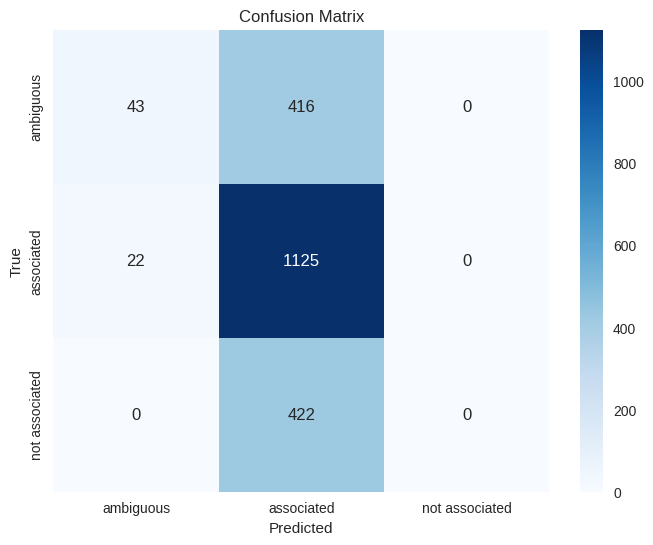

In [113]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_encoded, best_xgb_y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


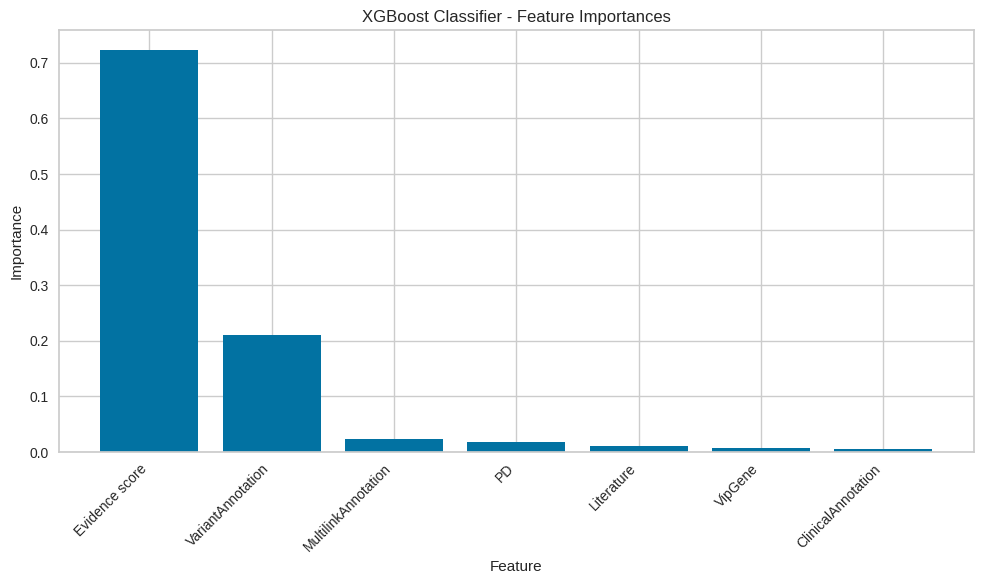

In [114]:
import matplotlib.pyplot as plt

# Get the feature importances
feature_importances = best_xgb_classifier.feature_importances_
feature_names = X_train.columns

# Sort the features and their importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Classifier - Feature Importances')
plt.tight_layout()
plt.show()


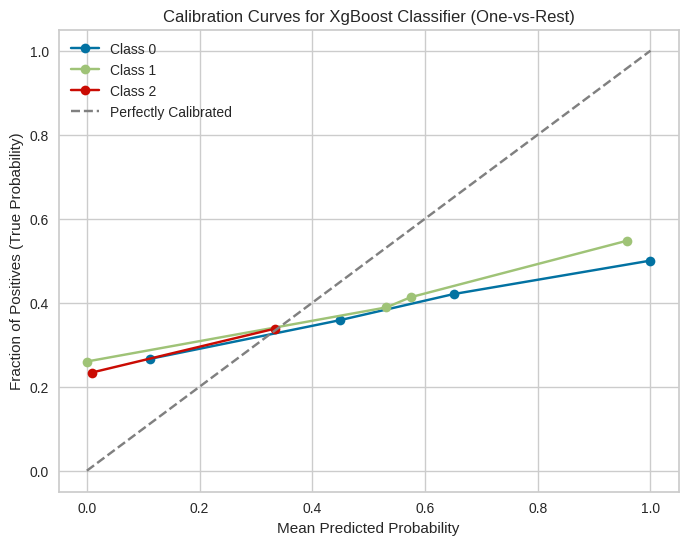

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize

# Fit the classifier with the best hyperparameters
best_dt_classifier.fit(X_train, y_train_encoded)
y_prob_all_classes = best_xgb_classifier.predict_proba(X_test)

# Binarize the true labels (one-vs-rest)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
calibration_curves = []
for class_label in np.unique(y_train_encoded):
    true_prob, true_labels = calibration_curve(y_test_bin[:, class_label], y_prob_all_classes[:, class_label], n_bins=10)
    calibration_curves.append((true_prob, true_labels))

# Plot the calibration curves for each class
plt.figure(figsize=(8, 6))
for i, (true_prob, true_labels) in enumerate(calibration_curves):
    plt.plot(true_prob, true_labels, marker='o', linestyle='-', label=f'Class {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (True Probability)')
plt.title('Calibration Curves for XgBoost Classifier (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


## KNN CLASSIFIER

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the KNN classifier
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],           # Varying the number of neighbors
    'weights': ['uniform', 'distance'],    # Varying the weight function
    'p': [1, 2]                            # Varying the distance metric (1: Manhattan, 2: Euclidean)
}

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
best_p = grid_search.best_params_['p']
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors,
                                           weights=best_weights,
                                           p=best_p)

best_knn_classifier.fit(X_train, y_train)
best_knn_y_pred = best_knn_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, best_knn_y_pred)
print("Best Accuracy:", accuracy)


Best Accuracy: 0.5108481262327417


In [117]:
from sklearn.metrics import precision_score, recall_score

# Calculate the precision and recall
precision = precision_score(y_test, best_knn_y_pred, average='weighted')
recall = recall_score(y_test, best_knn_y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.5113216127110155
Recall: 0.5108481262327417


In [118]:
f1 = f1_score(y_test, best_knn_y_pred, average='weighted')
print("F1 score:", f1)

F1 score: 0.5059558126505428


In [119]:
scores_KNN = cross_val_score(knn_classifier, X_train, y_train_encoded, cv=5)
print("Cross validation Score:", scores_KNN.mean())

Cross validation Score: 0.5041058956450287


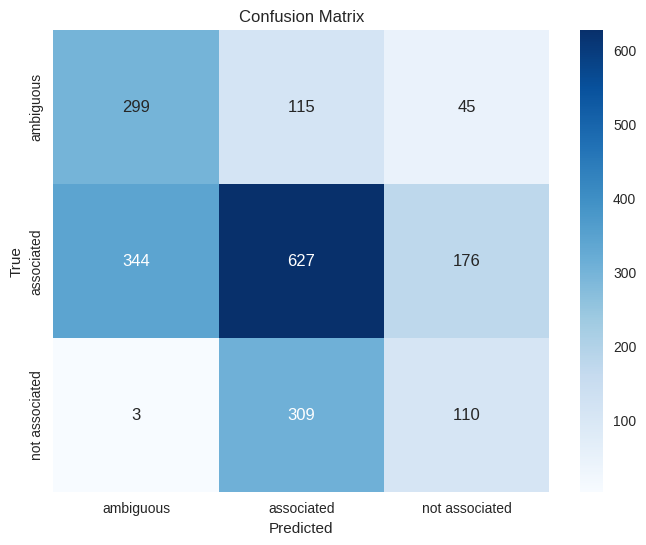

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, best_knn_y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


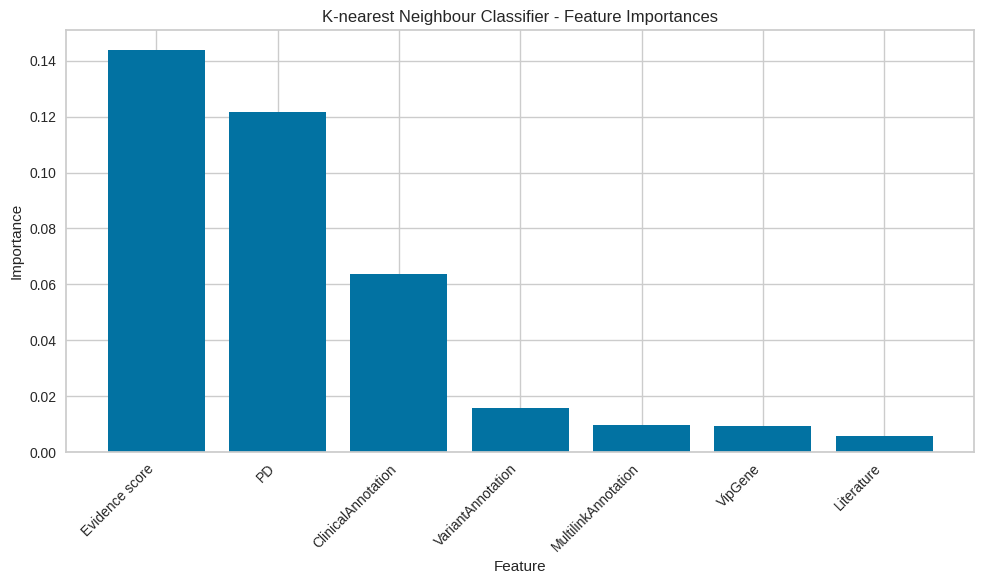

In [121]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the feature importances using mutual information
feature_importances = mutual_info_classif(X_train, y_train)

# Sort the features and their importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('K-nearest Neighbour Classifier - Feature Importances')
plt.tight_layout()
plt.show()


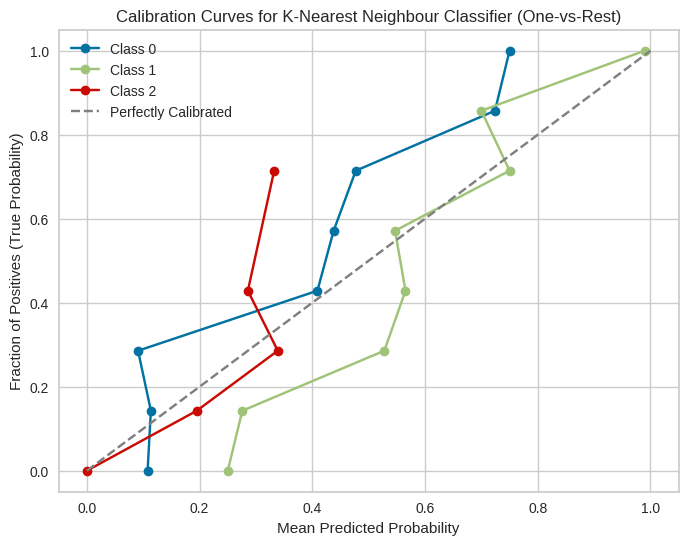

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize

best_dt_classifier.fit(X_train, y_train_encoded)
y_prob_all_classes = best_knn_classifier.predict_proba(X_test)

# Binarize the true labels (one-vs-rest)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
calibration_curves = []
for class_label in np.unique(y_train_encoded):
    true_prob, true_labels = calibration_curve(y_test_bin[:, class_label], y_prob_all_classes[:, class_label], n_bins=10)
    calibration_curves.append((true_prob, true_labels))

# Plot the calibration curves for each class
plt.figure(figsize=(8, 6))
for i, (true_prob, true_labels) in enumerate(calibration_curves):
    plt.plot(true_prob, true_labels, marker='o', linestyle='-', label=f'Class {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (True Probability)')
plt.title('Calibration Curves for K-Nearest Neighbour Classifier (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()
